In [12]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data1 = pd.read_csv('/content/drive/MyDrive/code/code/rajthewee/dataAir.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10],parse_dates=['date'], skipinitialspace=True)
data1

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 11 columns]

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm25              1706 non-null   float64       
 2   pm10              1764 non-null   float64       
 3   o3                1701 non-null   float64       
 4   no2               1454 non-null   float64       
 5   co                1247 non-null   float64       
 6   avgT              1695 non-null   float64       
 7   humid             1765 non-null   float64       
 8   pressure-monthly  1765 non-null   float64       
 9   windDir           1735 non-null   float64       
 10  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 151.8 KB


In [19]:
data2=data1.sort_values('date').reset_index(drop=True).copy()
data2

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 11 columns]

In [20]:
y_col='pm25'

In [21]:
data2.dropna(subset=[y_col], inplace=True)
data2=data2.reset_index(drop=True)
data2

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1701 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1702 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1703 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1704 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1705 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1701           1009.24    120.0      9.0  
1702           1009.24    170.0      7.0  
1703           1009.24    120.0     13.0  
1704           1009.24    120.0     13.0  
1705           1009.24      NaN      NaN  

[1706 rows x 11 columns]

In [22]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [23]:
date_parts(data2)

In [24]:
data2

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1701 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1702 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1703 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1704 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1705 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  year  month  day   day_name  
0              1009.40    100.0      9.0  2018      1    1     Monday  
1              1009.40    120.0      4.0  2018      1    2    Tuesday  
2              1009.40     60.0      4.0  2018      1    3  Wednesday  
3              1009.40    330.0      6.0  2018      1    4   Thursday  
4              1009.40      NaN      NaN  2018      1    5     Friday  
...                ...      ...      ...   ...    ...  ...        ...  
1701           1009.24    120.0      9.0  2022     10   27   Thursday  
1702           1009.24    170.0      7.0  2022     10   28     Friday  
1703           1009.24    120.0     13.0  2022     10   29   Saturday  
1704           1009.24    120.0     13.0  2022     10   30     Sunday  
1705           1009.24      NaN      NaN  2022     10   31     Monday  

[1706 rows x 15 columns]

In [25]:
data2.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'co', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [26]:
df1=data2[['date', 'year', 'month', 'day', 'day_name', y_col]]
df1

date  year  month  day   day_name  pm25
0    2018-01-01  2018      1    1     Monday  21.0
1    2018-01-02  2018      1    2    Tuesday  26.0
2    2018-01-03  2018      1    3  Wednesday  38.0
3    2018-01-04  2018      1    4   Thursday  39.0
4    2018-01-05  2018      1    5     Friday  51.0
...         ...   ...    ...  ...        ...   ...
1701 2022-10-27  2022     10   27   Thursday   8.0
1702 2022-10-28  2022     10   28     Friday  11.0
1703 2022-10-29  2022     10   29   Saturday  12.0
1704 2022-10-30  2022     10   30     Sunday  23.0
1705 2022-10-31  2022     10   31     Monday  28.0

[1706 rows x 6 columns]

In [27]:
df1=df1.set_index('date')
df1

year  month  day   day_name  pm25
date                                         
2018-01-01  2018      1    1     Monday  21.0
2018-01-02  2018      1    2    Tuesday  26.0
2018-01-03  2018      1    3  Wednesday  38.0
2018-01-04  2018      1    4   Thursday  39.0
2018-01-05  2018      1    5     Friday  51.0
...          ...    ...  ...        ...   ...
2022-10-27  2022     10   27   Thursday   8.0
2022-10-28  2022     10   28     Friday  11.0
2022-10-29  2022     10   29   Saturday  12.0
2022-10-30  2022     10   30     Sunday  23.0
2022-10-31  2022     10   31     Monday  28.0

[1706 rows x 5 columns]

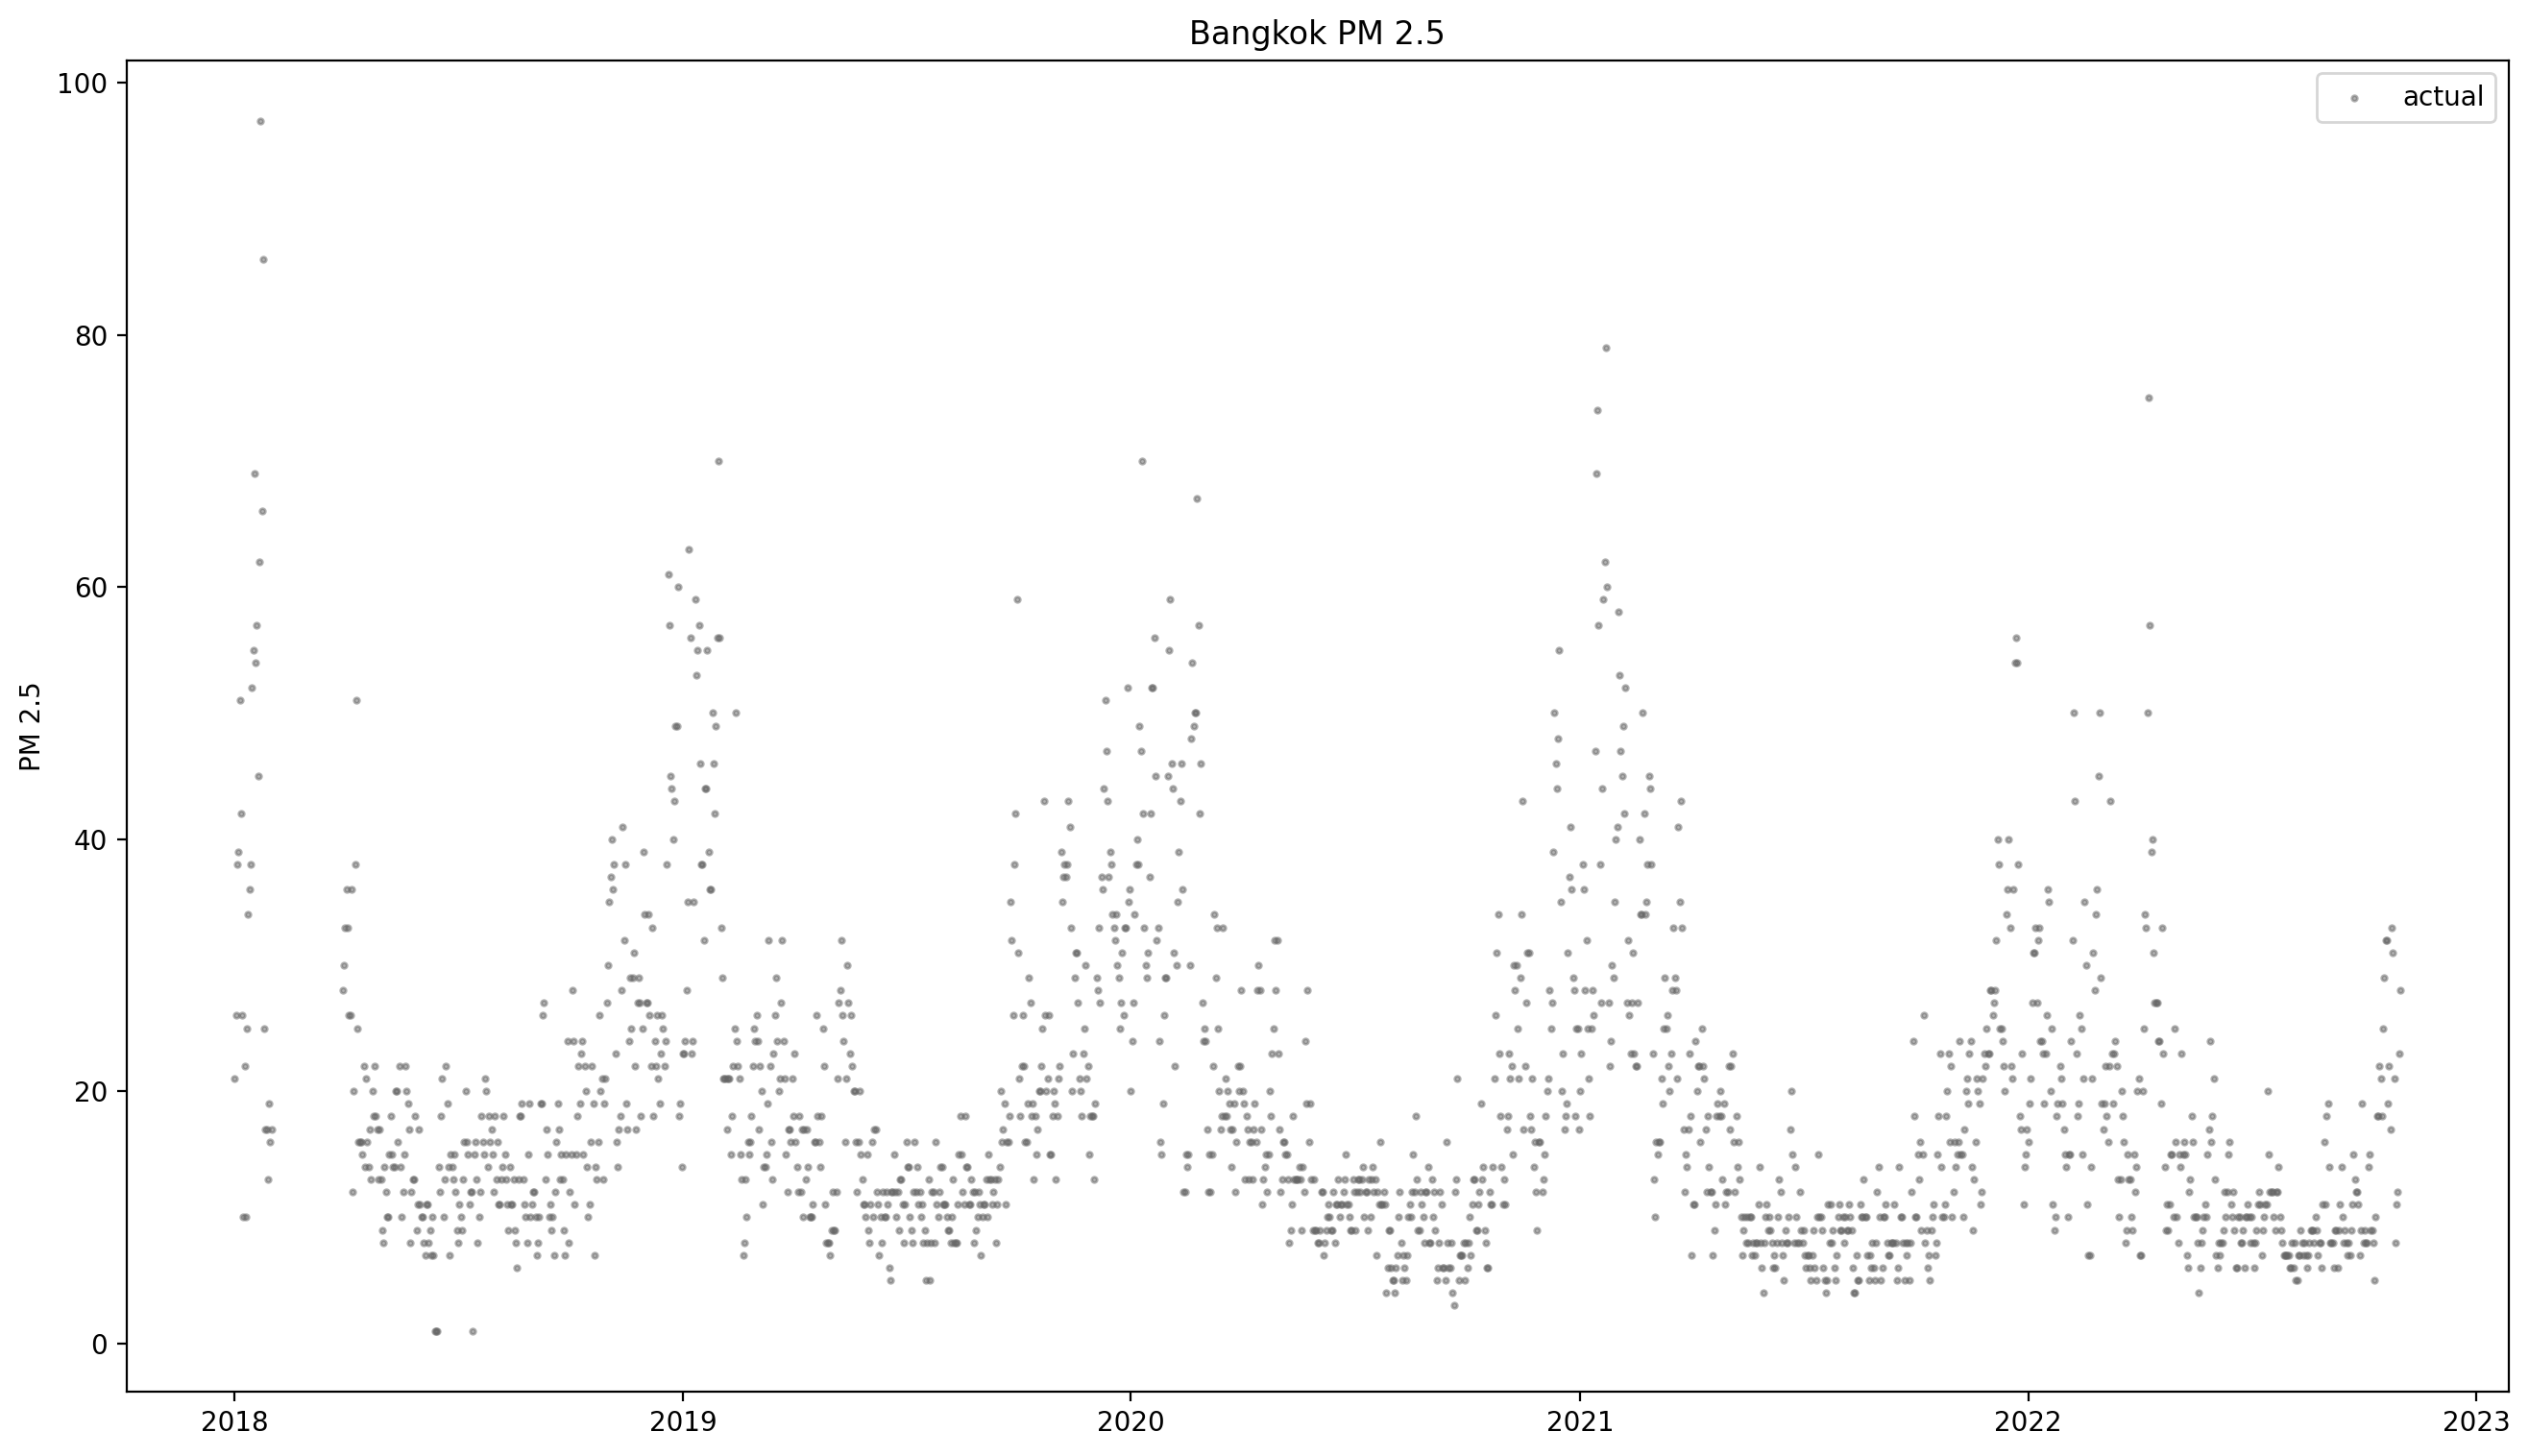

In [28]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [29]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df1[feature_cols]
y=df1[y_col]

In [30]:
split_at = 900
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [31]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [32]:
light_reg = lgb.LGBMRegressor()

In [33]:
light_reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [34]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [35]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
light_reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 91.2269
[20]	valid_0's l2: 91.1293
[30]	valid_0's l2: 92.0461
[40]	valid_0's l2: 93.4531
[50]	valid_0's l2: 94.9285
[60]	valid_0's l2: 96.7188
[70]	valid_0's l2: 97.8349
[80]	valid_0's l2: 98.1803
[90]	valid_0's l2: 99.2086
[100]	valid_0's l2: 99.6098


LGBMRegressor()

In [36]:
light_reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f228dde9df0>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [132.1706204615217,
                 121.42747761971306,
                 112.51135024510428,
                 106.43999870614707,
                 101.08893338471935,
                 97.5104911955834,
                 94.97519199644275,
                 93.41601284732428,
                 91.78348048407517,
                 91.2269261587955,
                 90.38191658551806,
                 90.03035118505386,
                 89.94924725881

In [37]:
light_pred = light_reg.predict(X_test)

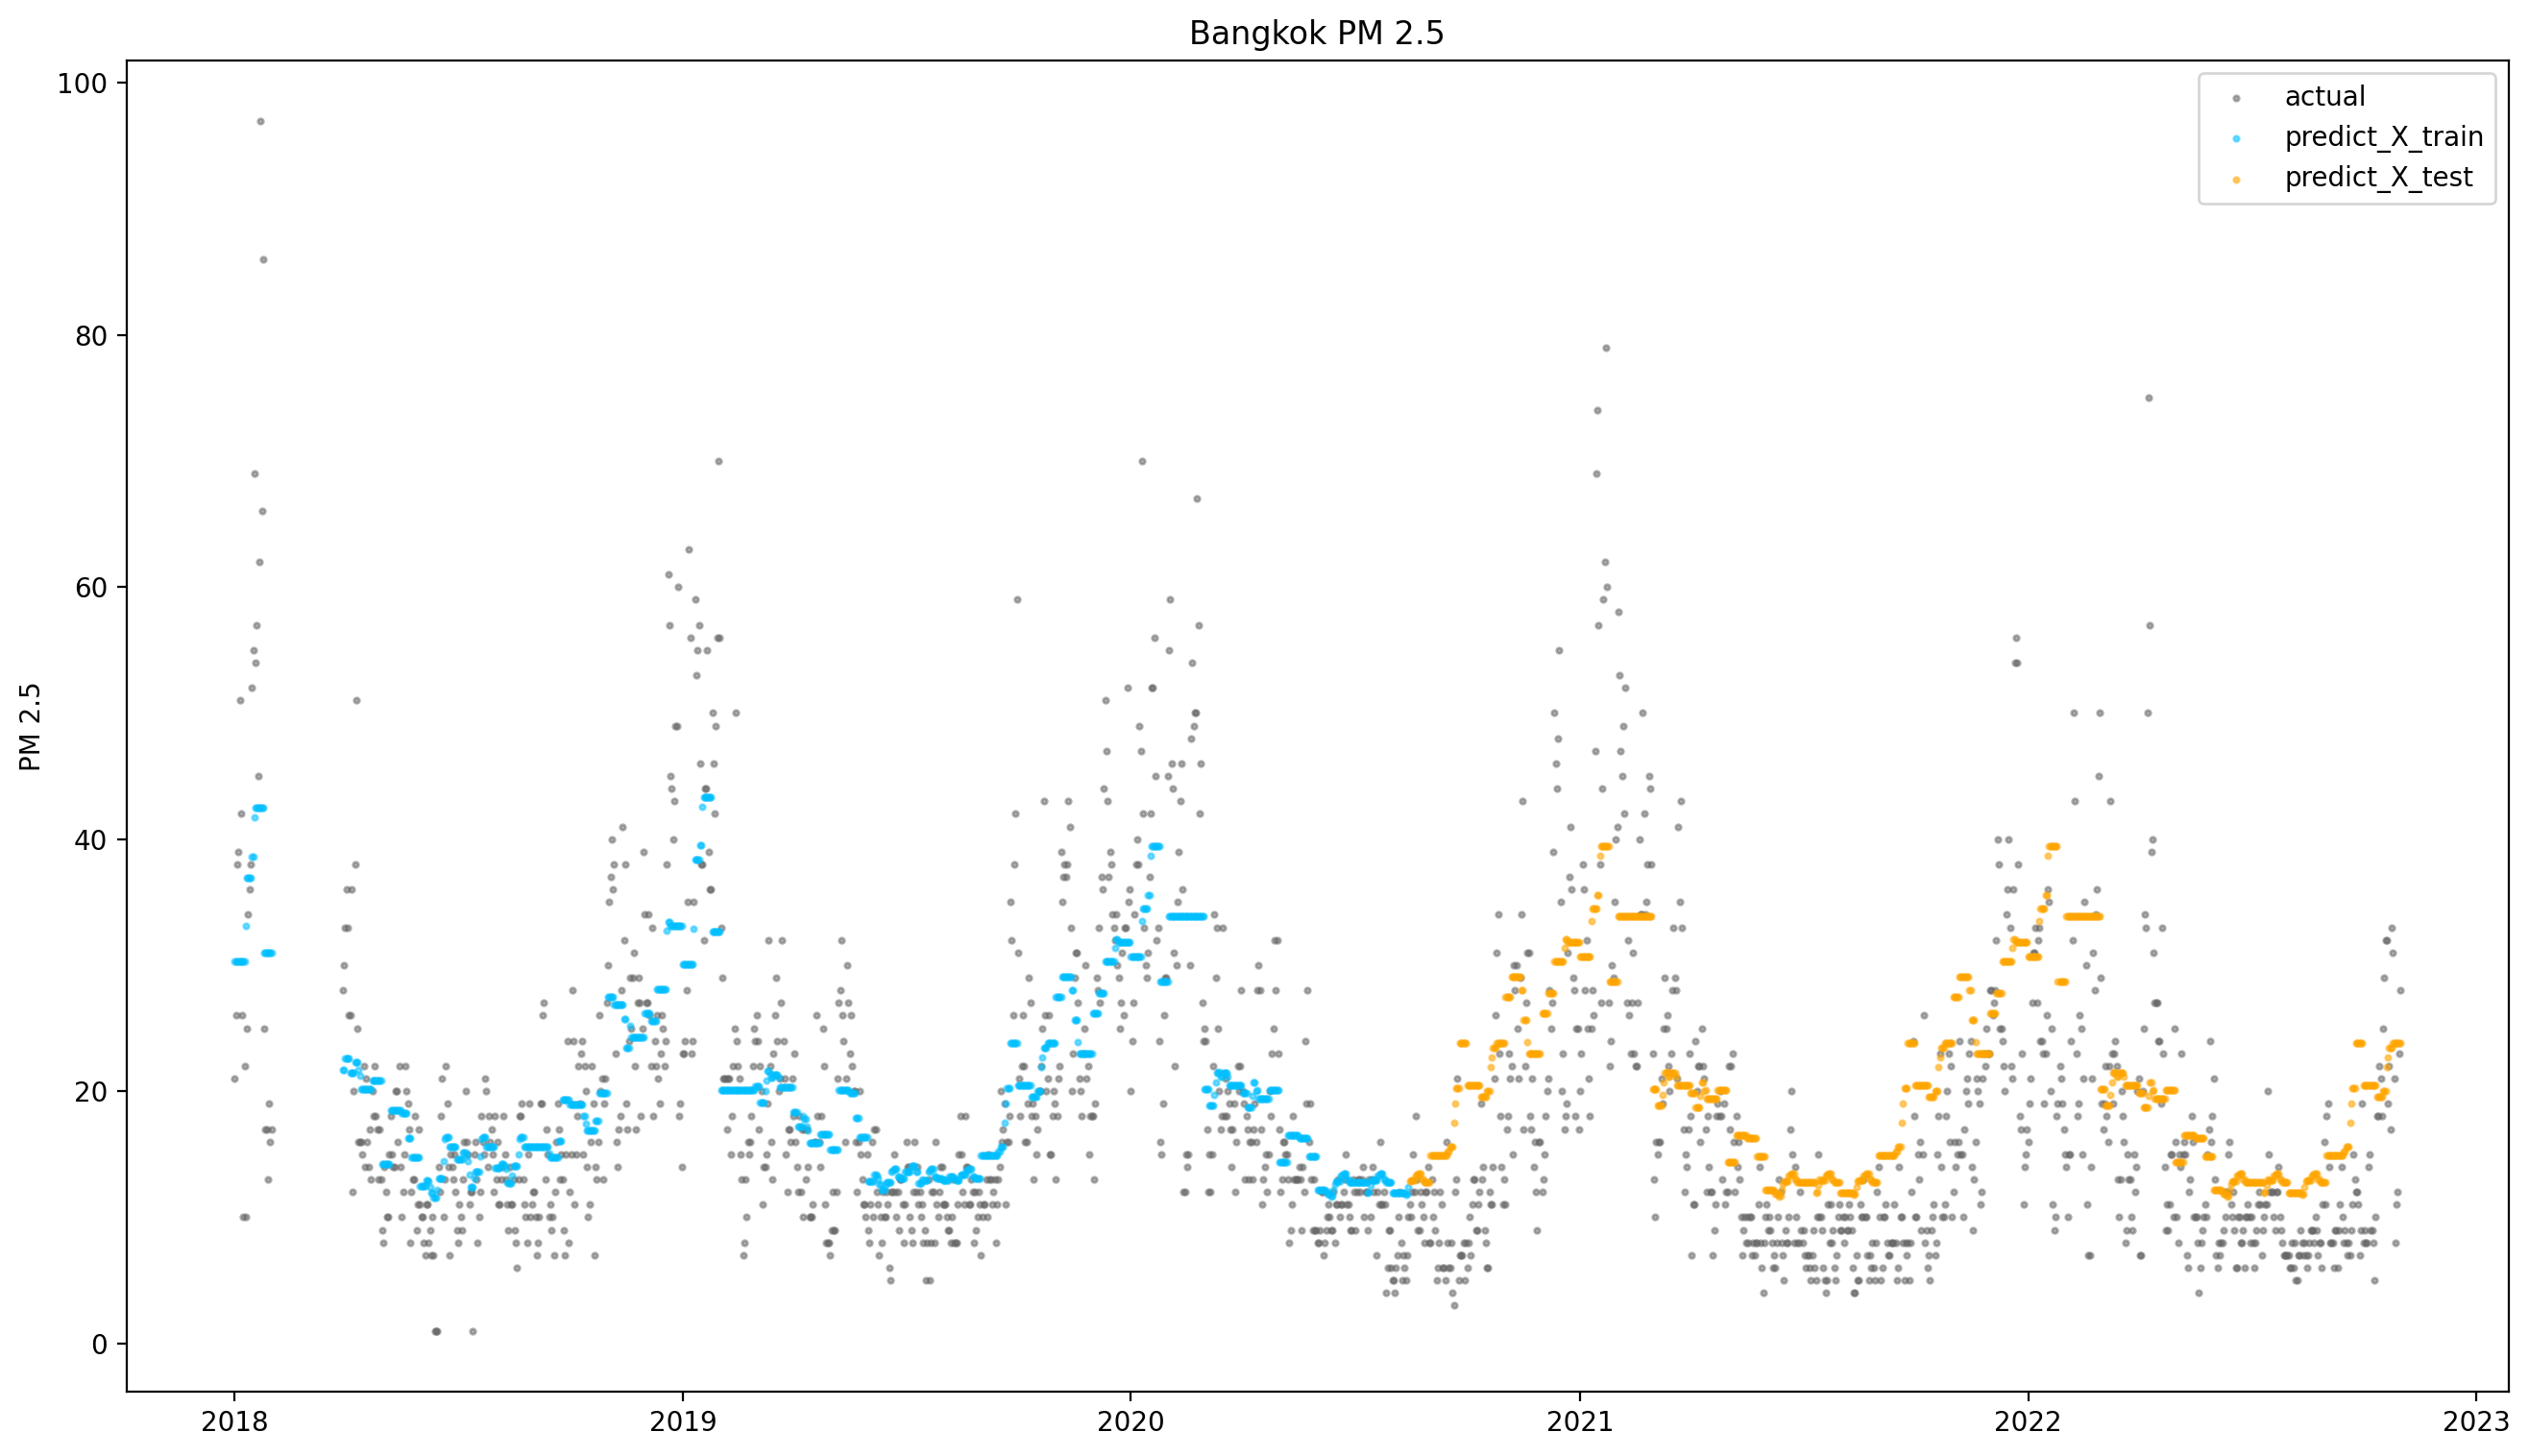

In [38]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [39]:
df1.head(3000)

year  month  day   day_name  pm25
date                                         
2018-01-01  2018      1    1     Monday  21.0
2018-01-02  2018      1    2    Tuesday  26.0
2018-01-03  2018      1    3  Wednesday  38.0
2018-01-04  2018      1    4   Thursday  39.0
2018-01-05  2018      1    5     Friday  51.0
...          ...    ...  ...        ...   ...
2022-10-27  2022     10   27   Thursday   8.0
2022-10-28  2022     10   28     Friday  11.0
2022-10-29  2022     10   29   Saturday  12.0
2022-10-30  2022     10   30     Sunday  23.0
2022-10-31  2022     10   31     Monday  28.0

[1706 rows x 5 columns]

In [40]:
yhat1=[]

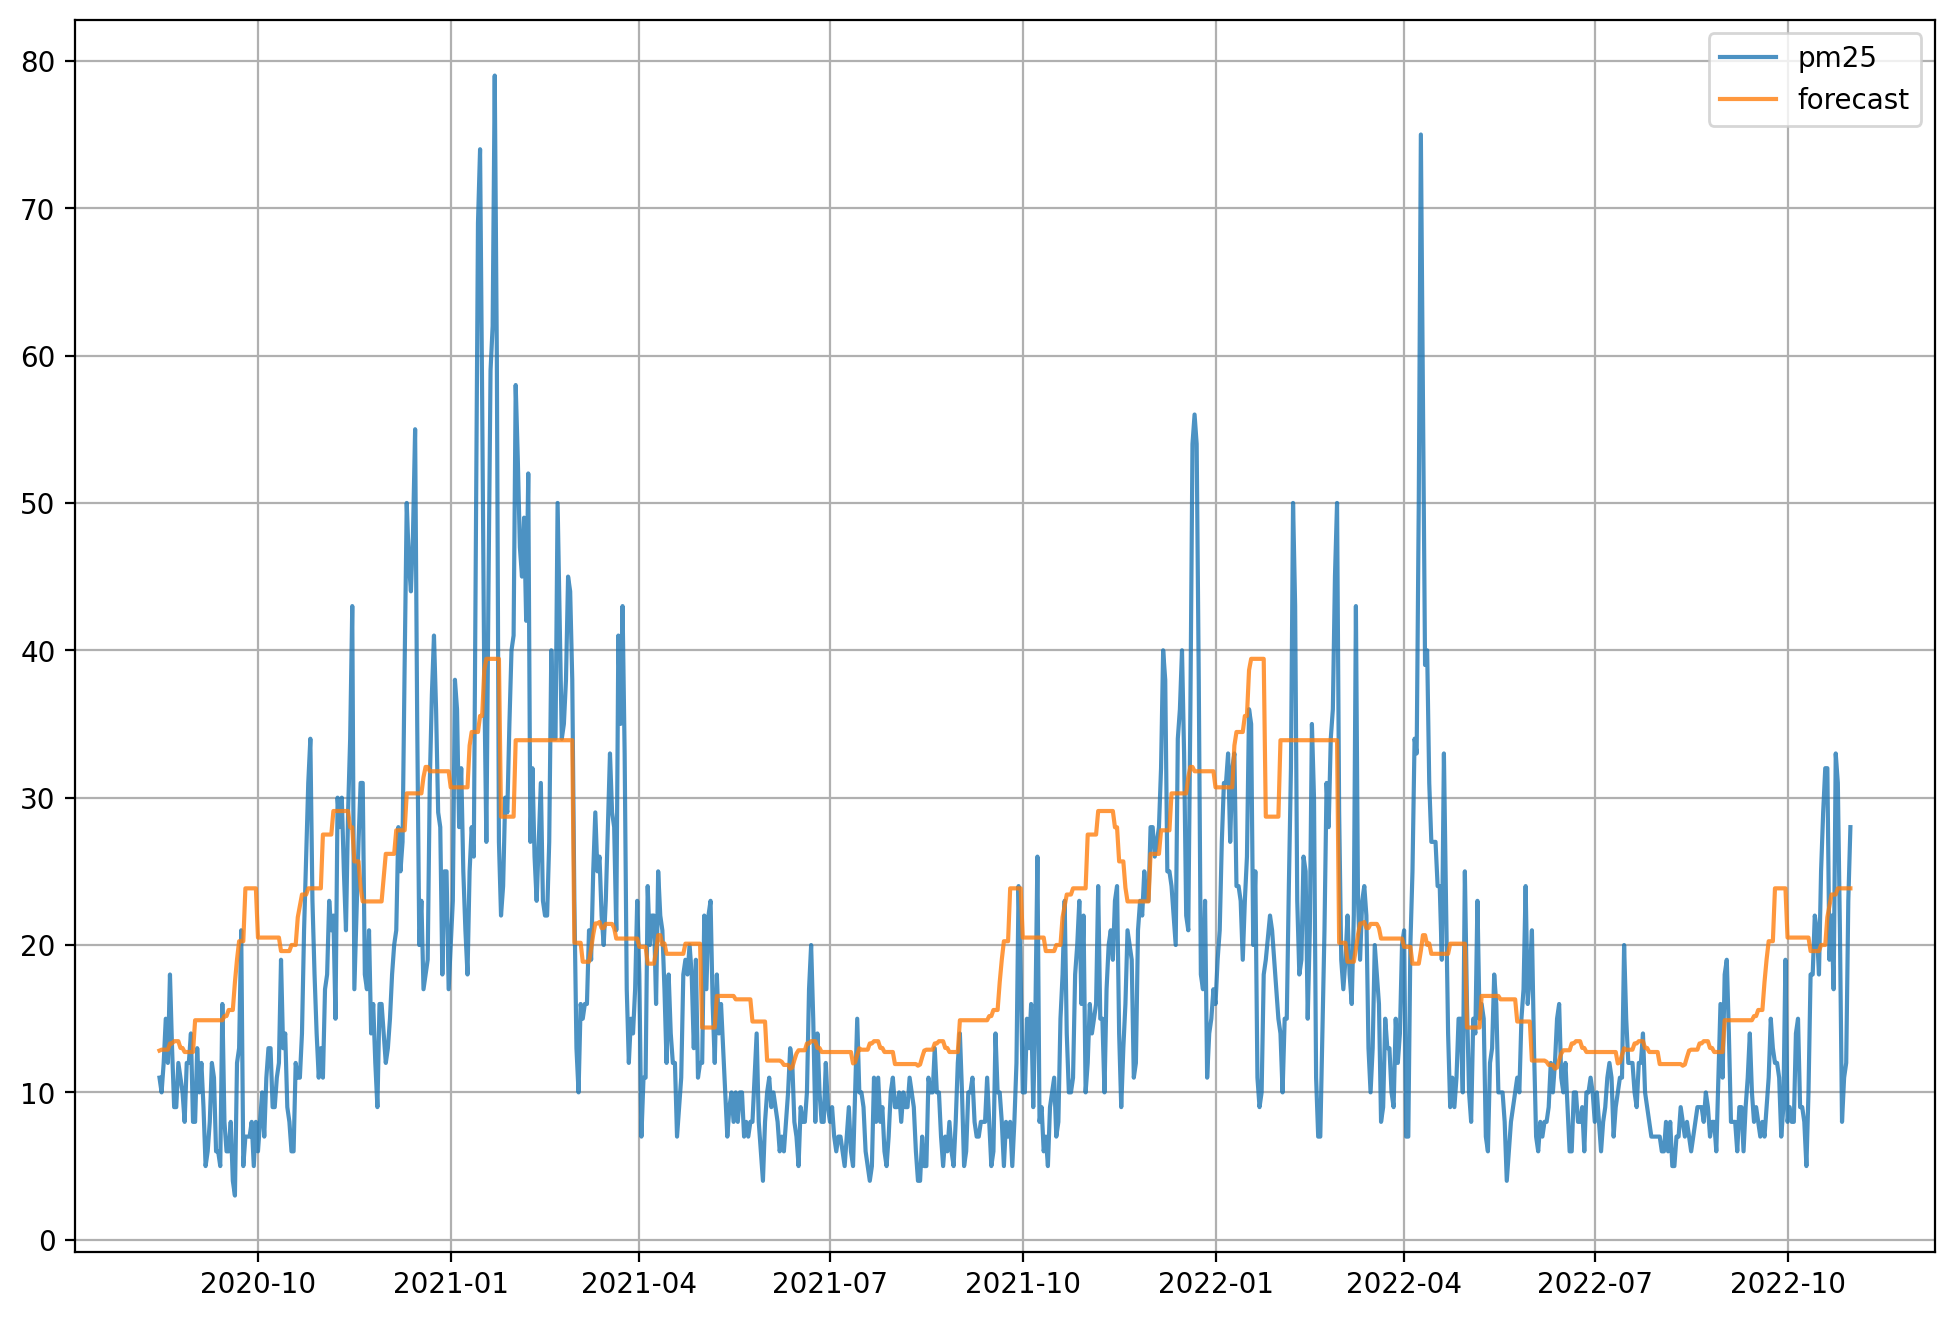

In [41]:
# test พยากรณ์กราฟ
yhat1 = light_reg.predict(X_test)

# Constructing the forecast dataframe
fc = df1.tail(len(yhat1)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat1
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [42]:
predict = pd.DataFrame(yhat1)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7)
ypred


พยากรณ์ PM2.5
0      12.837397
1      12.898823
2      12.898823
3      12.898823
4      12.898823
5      13.322663
6      13.322663

In [43]:
Y_pred=light_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(Y_pred,y_test)
print('MSE',mse1)
rmse = np.sqrt(mse1)
print('RMSE',rmse)

 
test=X_test.copy()
test['light_pred'] = light_pred
test

MSE 89.67948534927459
RMSE 9.469925308537263


year  month  day   day_name  light_pred
date                                               
2020-08-15  2020      8   15   Saturday   12.837397
2020-08-16  2020      8   16     Sunday   12.898823
2020-08-17  2020      8   17     Monday   12.898823
2020-08-18  2020      8   18    Tuesday   12.898823
2020-08-19  2020      8   19  Wednesday   12.898823
...          ...    ...  ...        ...         ...
2022-10-27  2022     10   27   Thursday   23.846860
2022-10-28  2022     10   28     Friday   23.846860
2022-10-29  2022     10   29   Saturday   23.846860
2022-10-30  2022     10   30     Sunday   23.846860
2022-10-31  2022     10   31     Monday   23.846860

[806 rows x 5 columns]

In [44]:
#LSTM

In [45]:
from pandas import read_csv
from datetime import datetime
	
df2 = pd.read_csv('/content/drive/MyDrive/code/code/rajthewee/dataAir.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)


In [50]:
df2.describe().round(2).T

count     mean    std      min      25%      50%      75%  \
pm25              1706.0    18.96  12.30     1.00    10.00    15.00    24.00   
pm10              1764.0    32.74  16.10     0.00    21.00    28.00    40.00   
o3                1701.0    26.29  11.83     0.50    17.00    24.96    34.22   
no2               1454.0    16.44   8.46     0.35    10.22    14.35    21.13   
co                1247.0     1.73  35.40     0.00     0.35     0.55     0.84   
avgT              1695.0    30.24   1.76    16.60    29.30    30.30    31.30   
humid             1765.0    73.93   8.26    32.00    69.00    74.00    79.00   
pressure-monthly  1765.0  1008.48   2.13  1004.94  1006.53  1008.20  1010.15   
windDir           1735.0   188.91  85.55     0.00   120.00   190.00   250.00   
windSpd           1737.0     8.07   2.61     1.00     6.00     8.00     9.00   

                      max  
pm25                97.00  
pm10               128.00  
o3                  81.57  
no2                 60.52  
co                1250.00  
avgT                35.10  
humid               97.00  
pressure-monthly  1012.61  
windDir            360.00  
windSpd             24.00

In [51]:
dd = df2.drop(['pm25', 'pm10','no2', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

o3
date             
2018-01-01  37.91
2018-01-02  38.22
2018-01-03  29.50
2018-01-04  45.09
2018-01-05  49.26

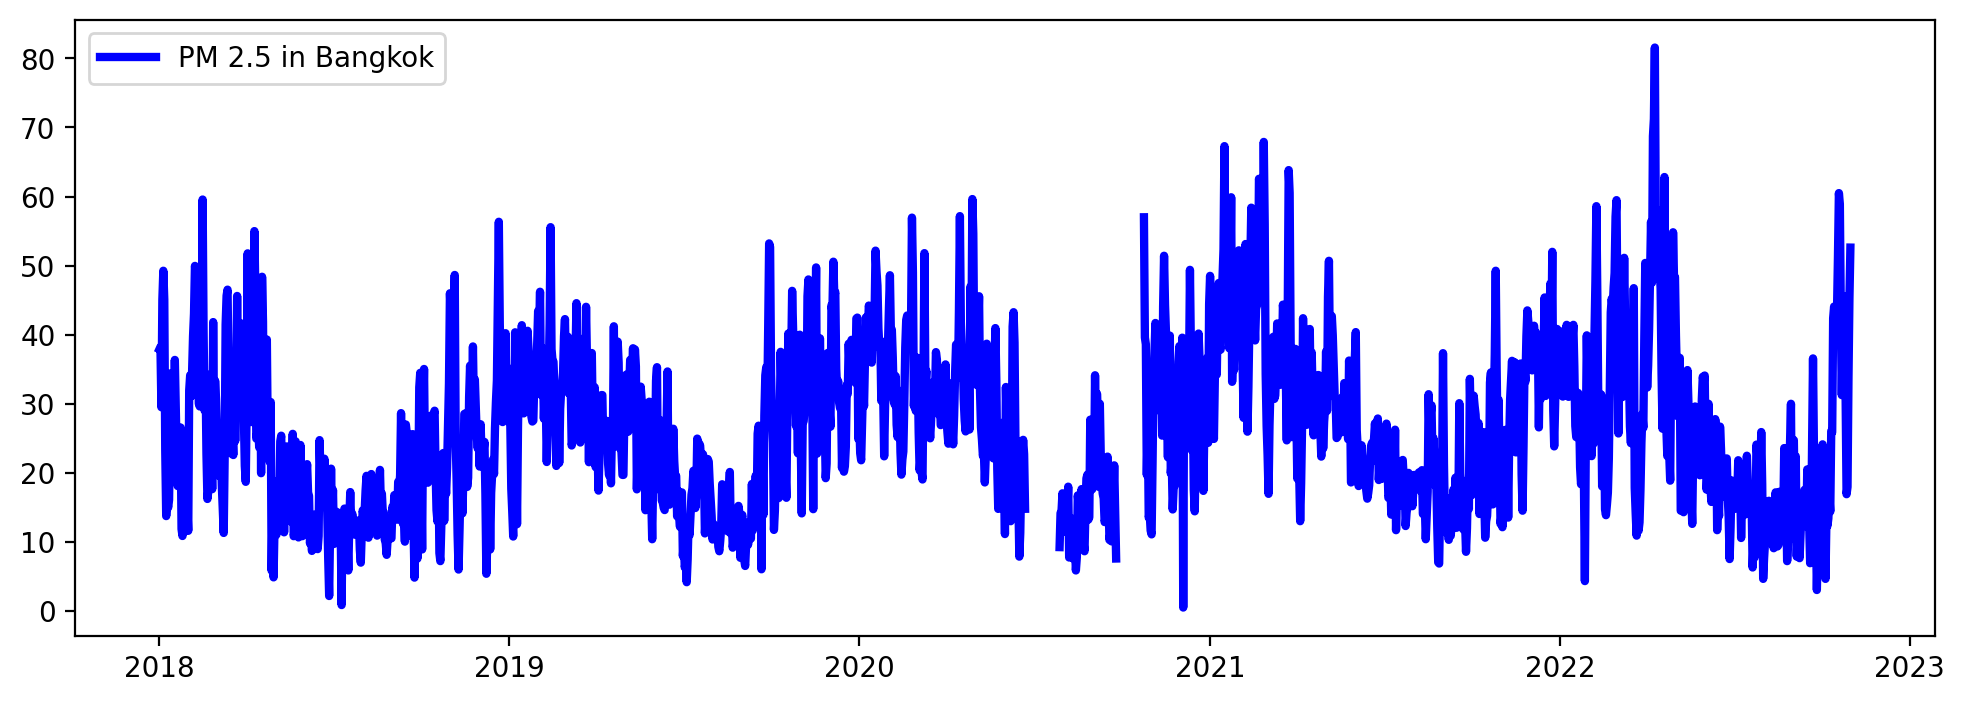

In [52]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Bangkok')
plt.legend()
plt.show()

In [53]:
y_col='pm25'

In [54]:
df2.dropna(subset=[y_col], inplace=True)
df = df2.reset_index(drop=True)
df

pm25  pm10     o3    no2    co  avgT  humid  pressure-monthly  windDir  \
0     21.0  32.0  37.91  13.26  0.64  27.1   70.0           1009.40    100.0   
1     26.0  37.0  38.22  18.96  0.68  27.5   67.0           1009.40    120.0   
2     38.0  51.0  29.50  29.08  0.85  28.2   66.0           1009.40     60.0   
3     39.0  55.0  45.09  22.22  0.86  29.3   64.0           1009.40    330.0   
4     51.0  67.0  49.26  36.70  1.00  30.4   63.0           1009.40      NaN   
...    ...   ...    ...    ...   ...   ...    ...               ...      ...   
1701   8.0  20.0  16.91    NaN   NaN  28.5   79.0           1009.24    120.0   
1702  11.0  26.0  17.96    NaN   NaN  29.6   72.0           1009.24    170.0   
1703  12.0  27.0  33.70    NaN   NaN  29.5   62.0           1009.24    120.0   
1704  23.0  43.0  45.26    NaN   NaN  30.0   62.0           1009.24    120.0   
1705  28.0  45.0  52.61    NaN   NaN   NaN   59.0           1009.24      NaN   

      windSpd  
0         9.0  
1         4.0  
2         4.0  
3         6.0  
4         NaN  
...       ...  
1701      9.0  
1702      7.0  
1703     13.0  
1704     13.0  
1705      NaN  

[1706 rows x 10 columns]

In [55]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1706 entries, 2018-01-01 to 2022-10-31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm25              1706 non-null   float64
 1   pm10              1706 non-null   float64
 2   o3                1643 non-null   float64
 3   no2               1397 non-null   float64
 4   co                1190 non-null   float64
 5   avgT              1678 non-null   float64
 6   humid             1706 non-null   float64
 7   pressure-monthly  1706 non-null   float64
 8   windDir           1676 non-null   float64
 9   windSpd           1678 non-null   float64
dtypes: float64(10)
memory usage: 146.6 KB


(1706, 10)

In [56]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[2.08333333e-01, 2.64462810e-01, 4.61453065e-01, 2.14558750e-01,
        5.12000000e-04, 5.67567568e-01, 5.84615385e-01, 5.81486310e-01,
        2.77777778e-01, 3.47826087e-01],
       [2.60416667e-01, 3.05785124e-01, 4.65276921e-01, 3.09290344e-01,
        5.44000000e-04, 5.89189189e-01, 5.38461538e-01, 5.81486310e-01,
        3.33333333e-01, 1.30434783e-01],
       [3.85416667e-01, 4.21487603e-01, 3.57715554e-01, 4.77480472e-01,
        6.80000000e-04, 6.27027027e-01, 5.23076923e-01, 5.81486310e-01,
        1.66666667e-01, 1.30434783e-01],
       [3.95833333e-01, 4.54545455e-01, 5.50018503e-01, 3.63470168e-01,
        6.88000000e-04, 6.86486486e-01, 4.92307692e-01, 5.81486310e-01,
        9.16666667e-01, 2.17391304e-01],
       [5.20833333e-01, 5.53719008e-01, 6.01455532e-01, 6.04121655e-01,
        8.00000000e-04, 7.45945946e-01, 4.76923077e-01, 5.81486310e-01,
                   nan,            nan],
       [4.27083333e-01, 4.46280992e-01, 5.50018503e-01, 5.65065647e-01,
   

In [57]:
n_train = int(df.shape[0] * 0.80)
n_train

1364

In [58]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [59]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((1364, 10), (342, 10))

In [60]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [62]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [63]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df2,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [64]:
model = deep_learner.LSTModel() 

Epoch 1/60
6/6 [==============================] - 5s 134ms/step - loss: 561.1131 - val_loss: 292.3108
Epoch 2/60
6/6 [==============================] - 0s 34ms/step - loss: 494.3397 - val_loss: 252.8296
Epoch 3/60
6/6 [==============================] - 0s 33ms/step - loss: 410.2756 - val_loss: 200.0384
Epoch 4/60
6/6 [==============================] - 0s 33ms/step - loss: 293.8116 - val_loss: 138.9726
Epoch 5/60
6/6 [==============================] - 0s 36ms/step - loss: 187.5591 - val_loss: 128.2671
Epoch 6/60
6/6 [==============================] - 0s 37ms/step - loss: 168.2974 - val_loss: 104.3458
Epoch 7/60
6/6 [==============================] - 0s 36ms/step - loss: 125.5126 - val_loss: 86.3238
Epoch 8/60
6/6 [==============================] - 0s 38ms/step - loss: 103.8059 - val_loss: 73.0308
Epoch 9/60
6/6 [==============================] - 0s 38ms/step - loss: 82.6473 - val_loss: 57.1351
Epoch 10/60
6/6 [==============================] - 0s 42ms/step - loss: 62.2779 - val_loss: 45

In [65]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df2.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

8/8 [==============================] - 0s 3ms/step


In [66]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
7/7 [==============================] - 3s 168ms/step - loss: 596.6042
Epoch 2/10
7/7 [==============================] - 1s 168ms/step - loss: 267.6721
Epoch 3/10
7/7 [==============================] - 1s 141ms/step - loss: 134.8070
Epoch 4/10
7/7 [==============================] - 1s 91ms/step - loss: 99.3293
Epoch 5/10
7/7 [==============================] - 1s 86ms/step - loss: 83.4813
Epoch 6/10
7/7 [==============================] - 1s 90ms/step - loss: 71.3923
Epoch 7/10
7/7 [==============================] - 1s 88ms/step - loss: 61.8370
Epoch 8/10
7/7 [==============================] - 1s 87ms/step - loss: 53.7508
Epoch 9/10
7/7 [==============================] - 1s 89ms/step - loss: 50.7051
Epoch 10/10
1/1 [==============================] - 0s 25ms/step


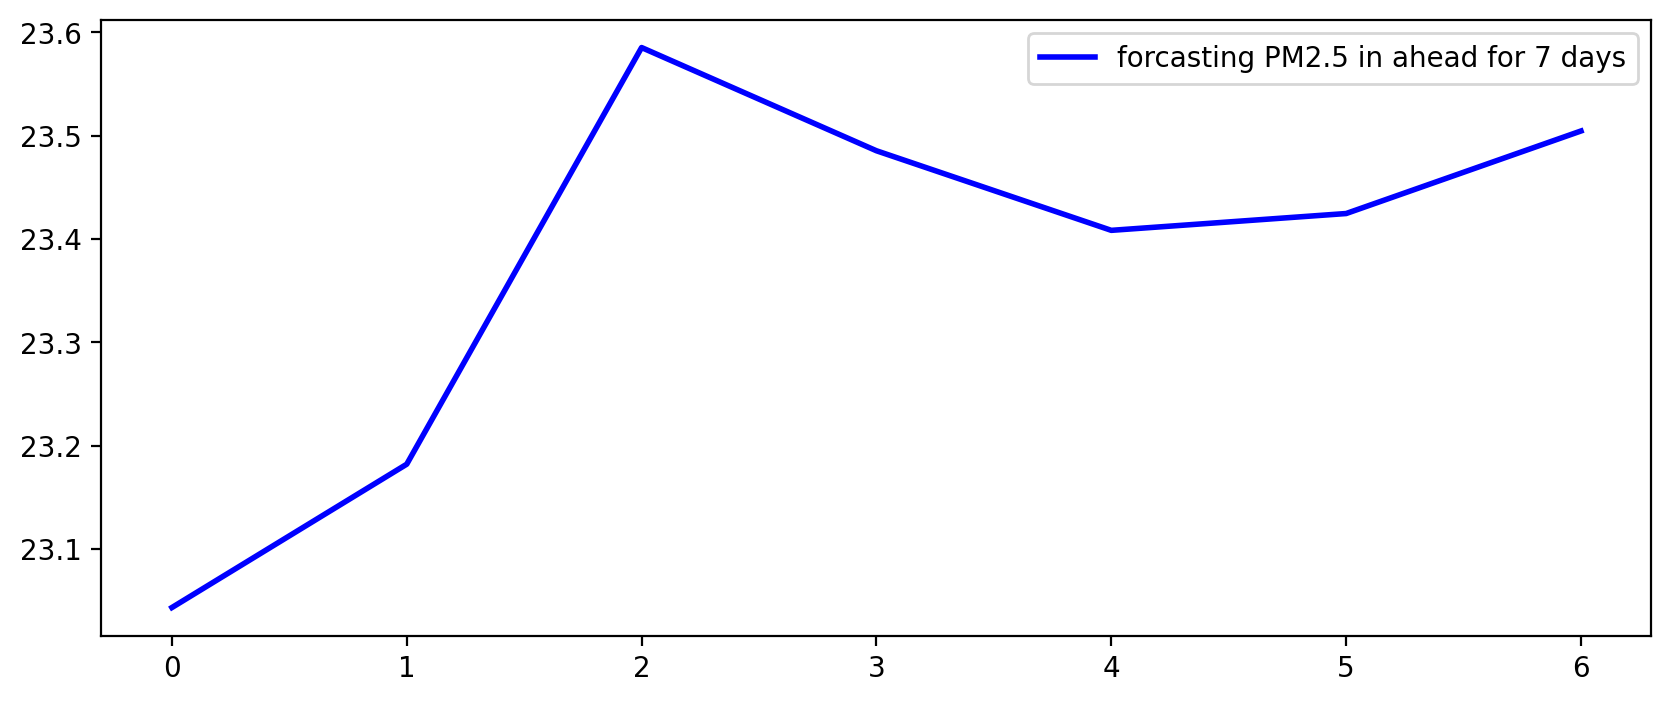

In [67]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [68]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

พยากรณ์ PM2.5
0      23.043352
1      23.182066
2      23.585175
3      23.485312
4      23.408316
5      23.424587
6      23.504446

In [69]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

พยากรณ์ PM2.5
0           23.0
1           23.0
2           24.0
3           23.0
4           23.0
5           23.0
6           24.0

In [70]:
ypred.mean().round(0)

พยากรณ์ PM2.5    23.0
dtype: float32

In [71]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(ypred,yhat)
p_mse = mse2*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 14.788638055324554
RMSE 3.845599830367761


In [72]:
#prophet

In [73]:
#import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
from pandas import read_csv
from datetime import datetime
	
df3 = pd.read_csv('/content/drive/MyDrive/code/code/rajthewee/dataAir.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,],parse_dates=['date'], skipinitialspace=True)
df3 

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 11 columns]

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm25              1706 non-null   float64       
 2   pm10              1764 non-null   float64       
 3   o3                1701 non-null   float64       
 4   no2               1454 non-null   float64       
 5   co                1247 non-null   float64       
 6   avgT              1695 non-null   float64       
 7   humid             1765 non-null   float64       
 8   pressure-monthly  1765 non-null   float64       
 9   windDir           1735 non-null   float64       
 10  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 151.8 KB


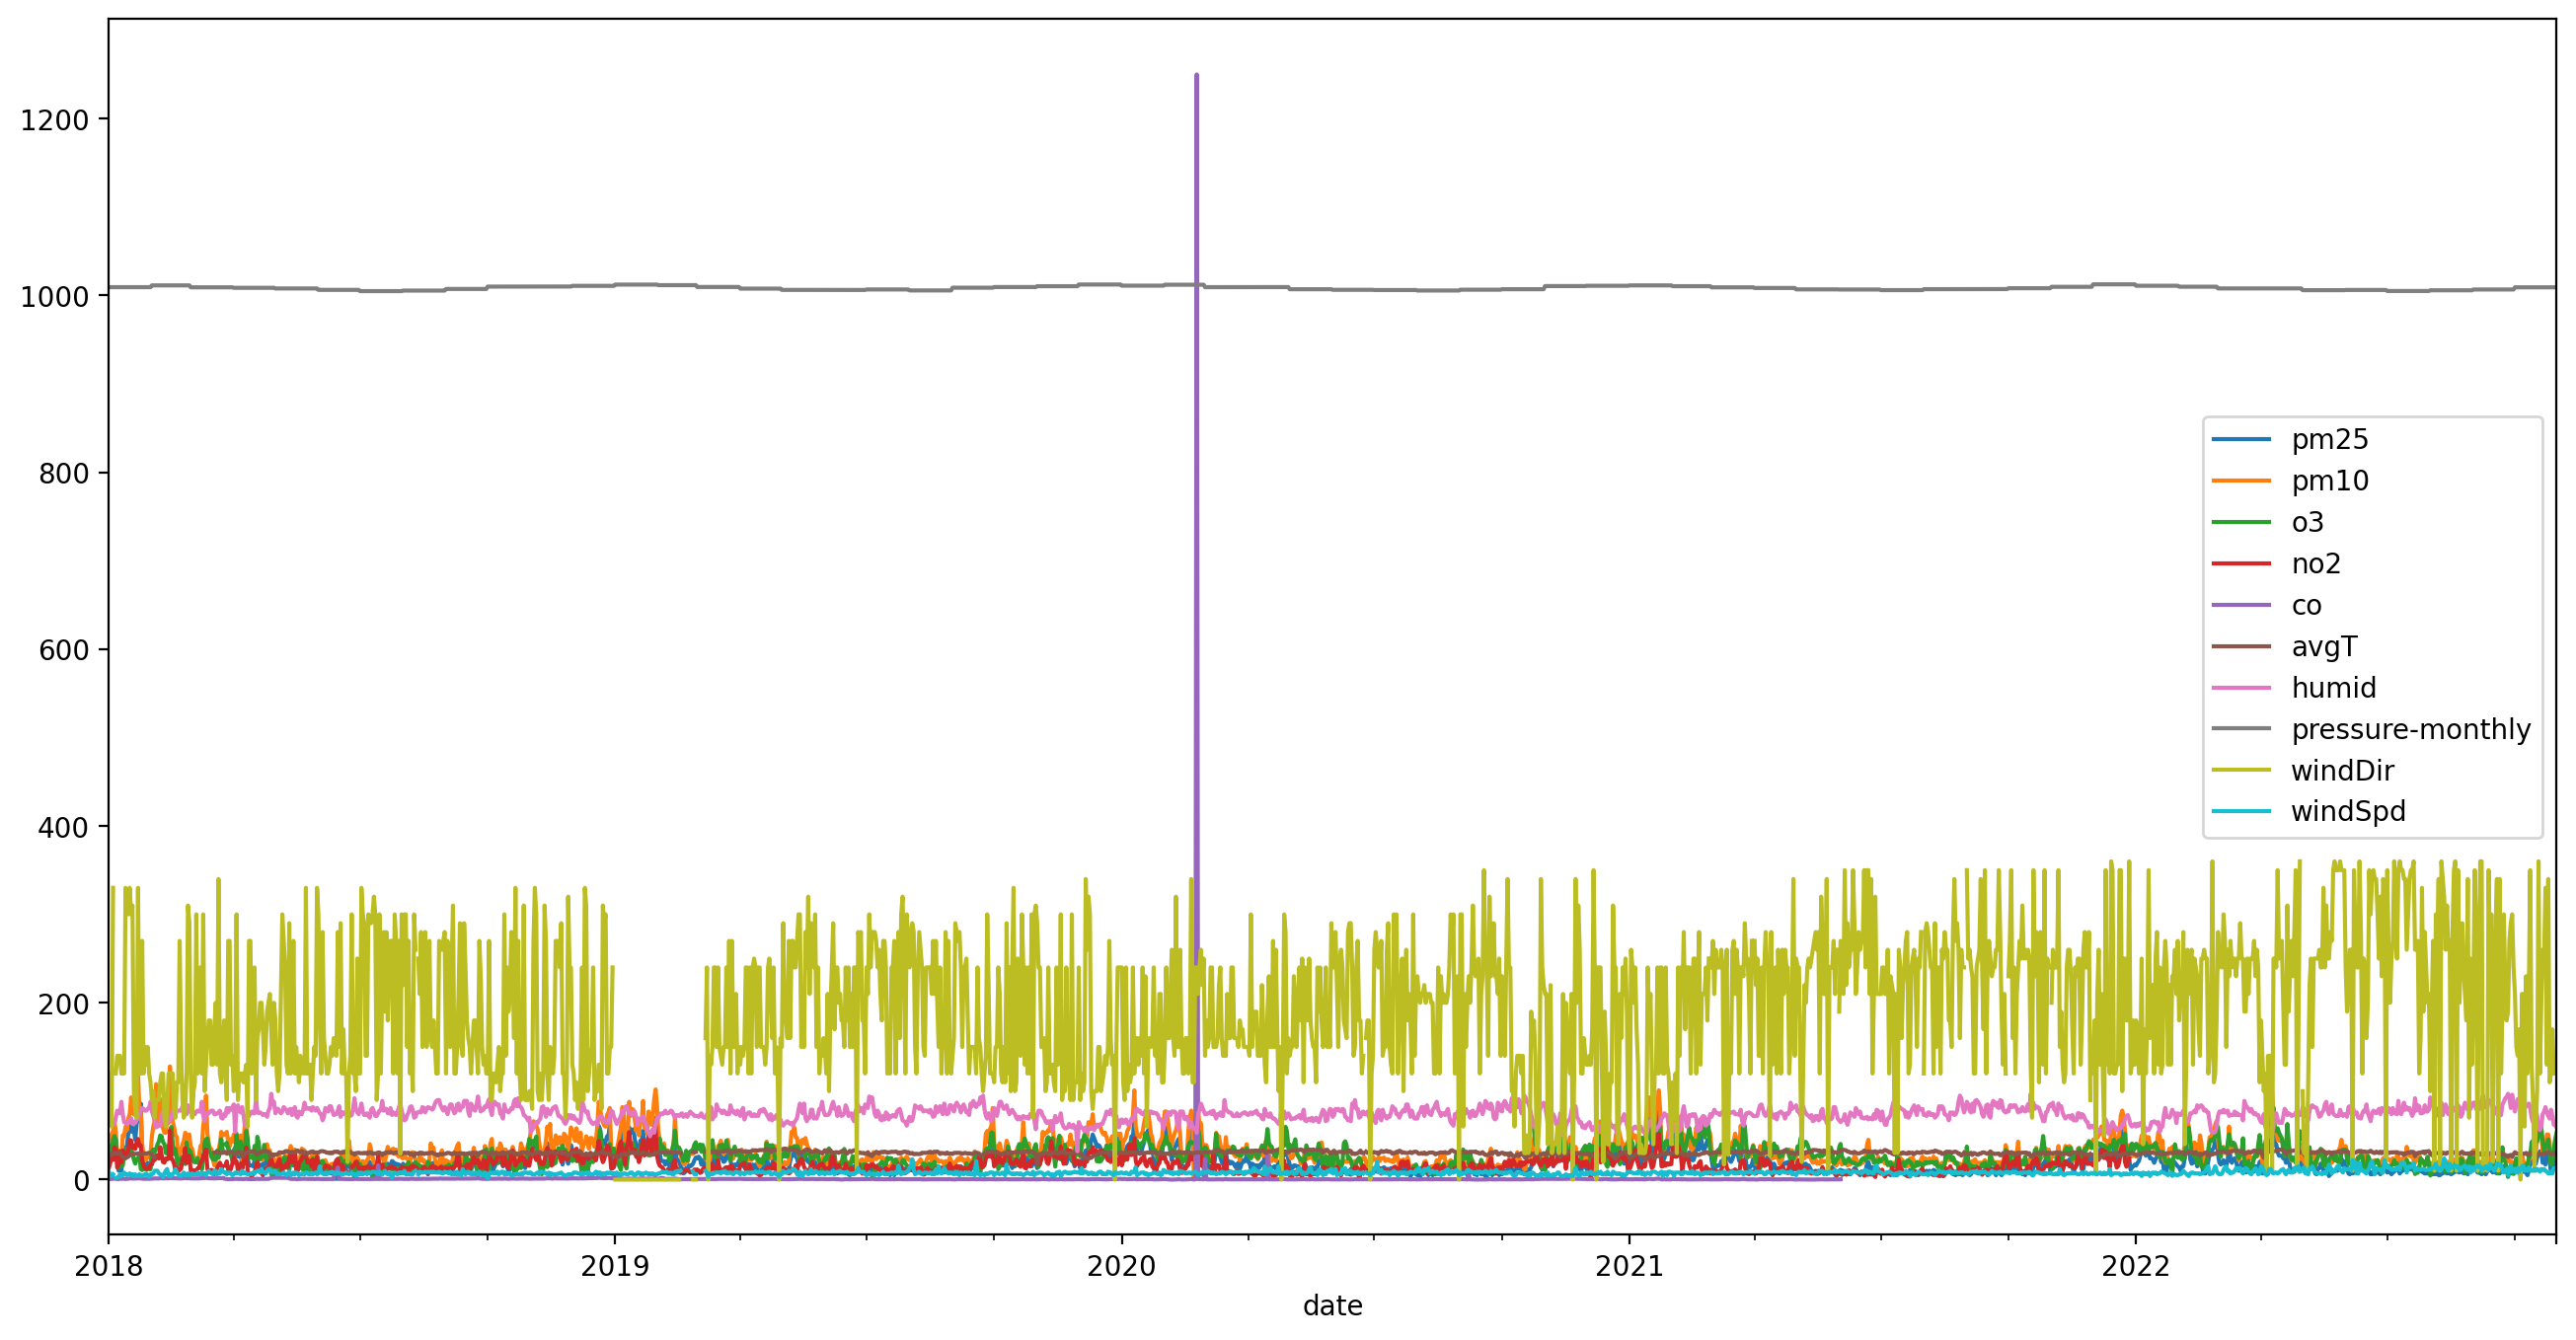

In [77]:
df3.set_index('date').plot(figsize=(16, 8));

In [78]:
data3 = df3.sort_values('date').reset_index(drop=True).copy()
data3

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 11 columns]

In [79]:
y_col = 'pm25'

In [80]:
data3.dropna(subset=[y_col], inplace=True)
data3

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1706 rows x 11 columns]

In [81]:
df3 = data3[['date', y_col]]
df3.columns=['ds', 'y']
df3

ds     y
0    2018-01-01  21.0
1    2018-01-02  26.0
2    2018-01-03  38.0
3    2018-01-04  39.0
4    2018-01-05  51.0
...         ...   ...
1760 2022-10-27   8.0
1761 2022-10-28  11.0
1762 2022-10-29  12.0
1763 2022-10-30  23.0
1764 2022-10-31  28.0

[1706 rows x 2 columns]

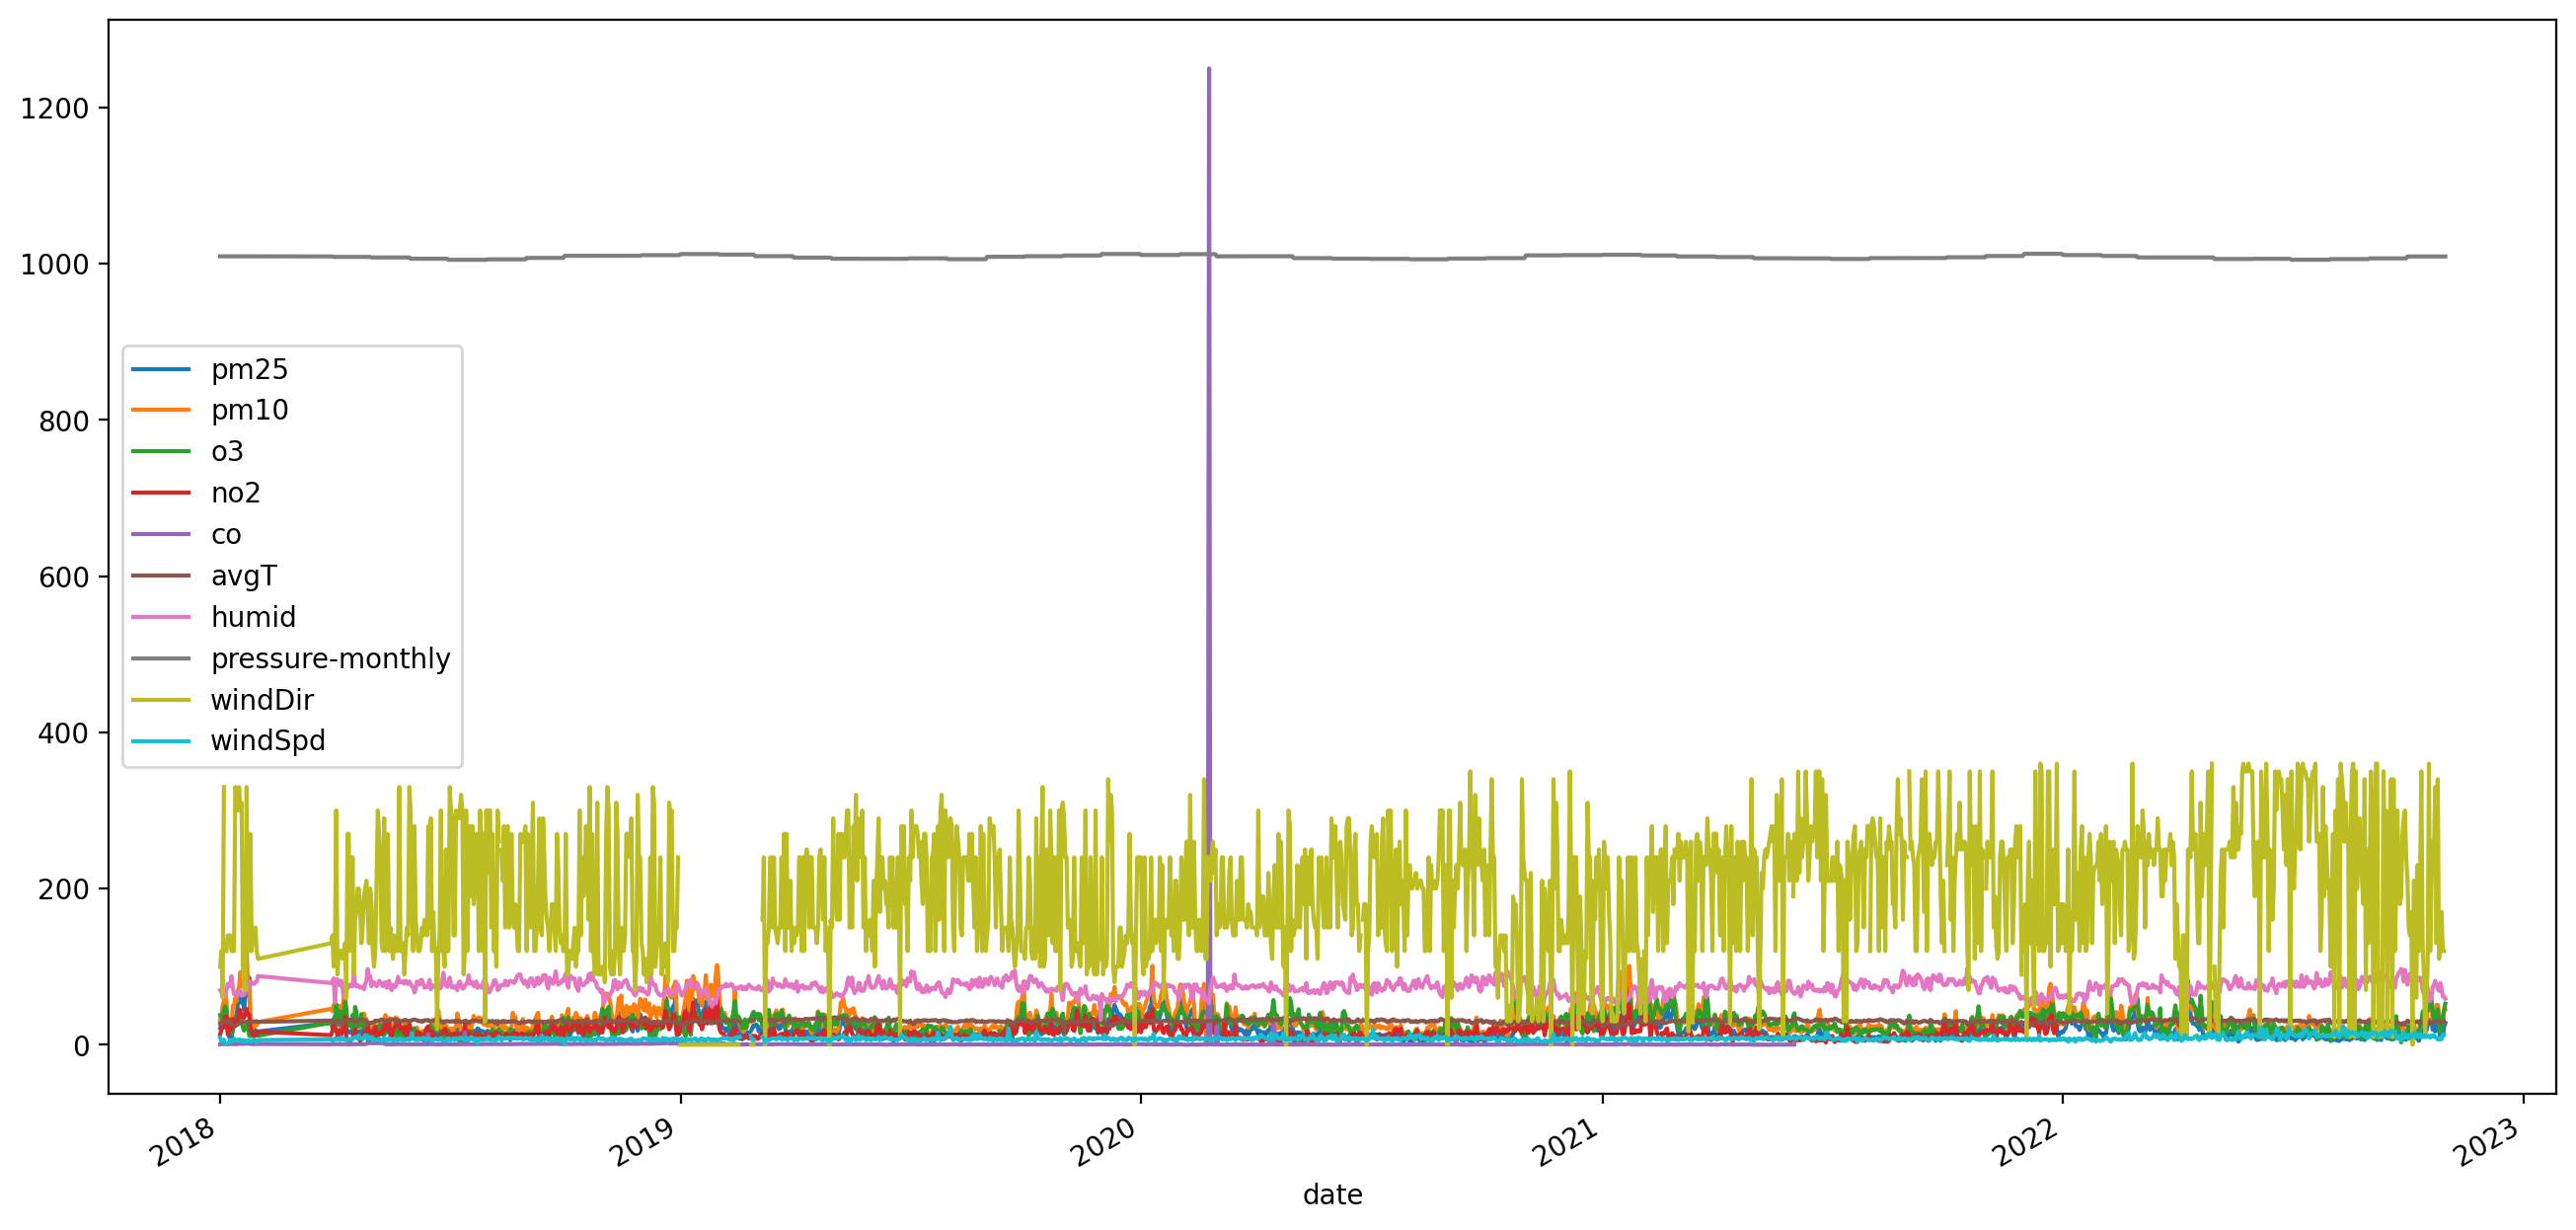

In [82]:
data3.set_index('date').plot(figsize=(16, 8));

In [83]:
model=Prophet()

In [84]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7f221c23bd60>}

In [85]:
model.fit(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l5l3i2r/tycx_82e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4l5l3i2r/fvqoyhwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75534', 'data', 'file=/tmp/tmp4l5l3i2r/tycx_82e.json', 'init=/tmp/tmp4l5l3i2r/fvqoyhwi.json', 'output', 'file=/tmp/tmp4l5l3i2r/prophet_modell5058guq/prophet_model-20230402094919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:49:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [86]:
df3.tail()

ds     y
1760 2022-10-27   8.0
1761 2022-10-28  11.0
1762 2022-10-29  12.0
1763 2022-10-30  23.0
1764 2022-10-31  28.0

In [87]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

ds
1881 2023-04-25
1882 2023-04-26
1883 2023-04-27
1884 2023-04-28
1885 2023-04-29

In [88]:
future.head()

ds
0 2018-01-01
1 2018-01-02
2 2018-01-03
3 2018-01-04
4 2018-01-05

In [89]:
ypred.mean().round(0)

พยากรณ์ PM2.5    23.0
dtype: float32

In [90]:
forecast = model.predict(future)

In [91]:
df3

ds     y
0    2018-01-01  21.0
1    2018-01-02  26.0
2    2018-01-03  38.0
3    2018-01-04  39.0
4    2018-01-05  51.0
...         ...   ...
1760 2022-10-27   8.0
1761 2022-10-28  11.0
1762 2022-10-29  12.0
1763 2022-10-30  23.0
1764 2022-10-31  28.0

[1706 rows x 2 columns]

In [92]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

ds       yhat  yhat_lower  yhat_upper
0    2018-01-01  32.180150   20.779724   42.102099
1    2018-01-02  32.409881   21.369868   42.846041
2    2018-01-03  33.072769   22.379630   44.175464
3    2018-01-04  32.665013   21.824255   43.195527
4    2018-01-05  33.439993   22.919812   44.286624
...         ...        ...         ...         ...
1881 2023-04-25  15.065846    3.393367   25.518484
1882 2023-04-26  15.201363    3.666297   27.064204
1883 2023-04-27  14.234972    2.209275   24.810463
1884 2023-04-28  14.424370    3.204488   24.579977
1885 2023-04-29  13.679351    2.947637   24.452245

[1886 rows x 4 columns]

In [93]:
dt=pd.merge(df3, dfcst, left_on='ds', right_on='ds')
dt

ds     y       yhat  yhat_lower  yhat_upper
0    2018-01-01  21.0  32.180150   20.779724   42.102099
1    2018-01-02  26.0  32.409881   21.369868   42.846041
2    2018-01-03  38.0  33.072769   22.379630   44.175464
3    2018-01-04  39.0  32.665013   21.824255   43.195527
4    2018-01-05  51.0  33.439993   22.919812   44.286624
...         ...   ...        ...         ...         ...
1701 2022-10-27   8.0  18.995672    8.206661   30.061241
1702 2022-10-28  11.0  19.989670    9.192124   31.316887
1703 2022-10-29  12.0  19.980121    8.117427   30.740604
1704 2022-10-30  23.0  20.372640   10.380283   31.533429
1705 2022-10-31  28.0  21.861204   11.690228   32.307225

[1706 rows x 5 columns]

In [94]:
dt.shape

(1706, 5)

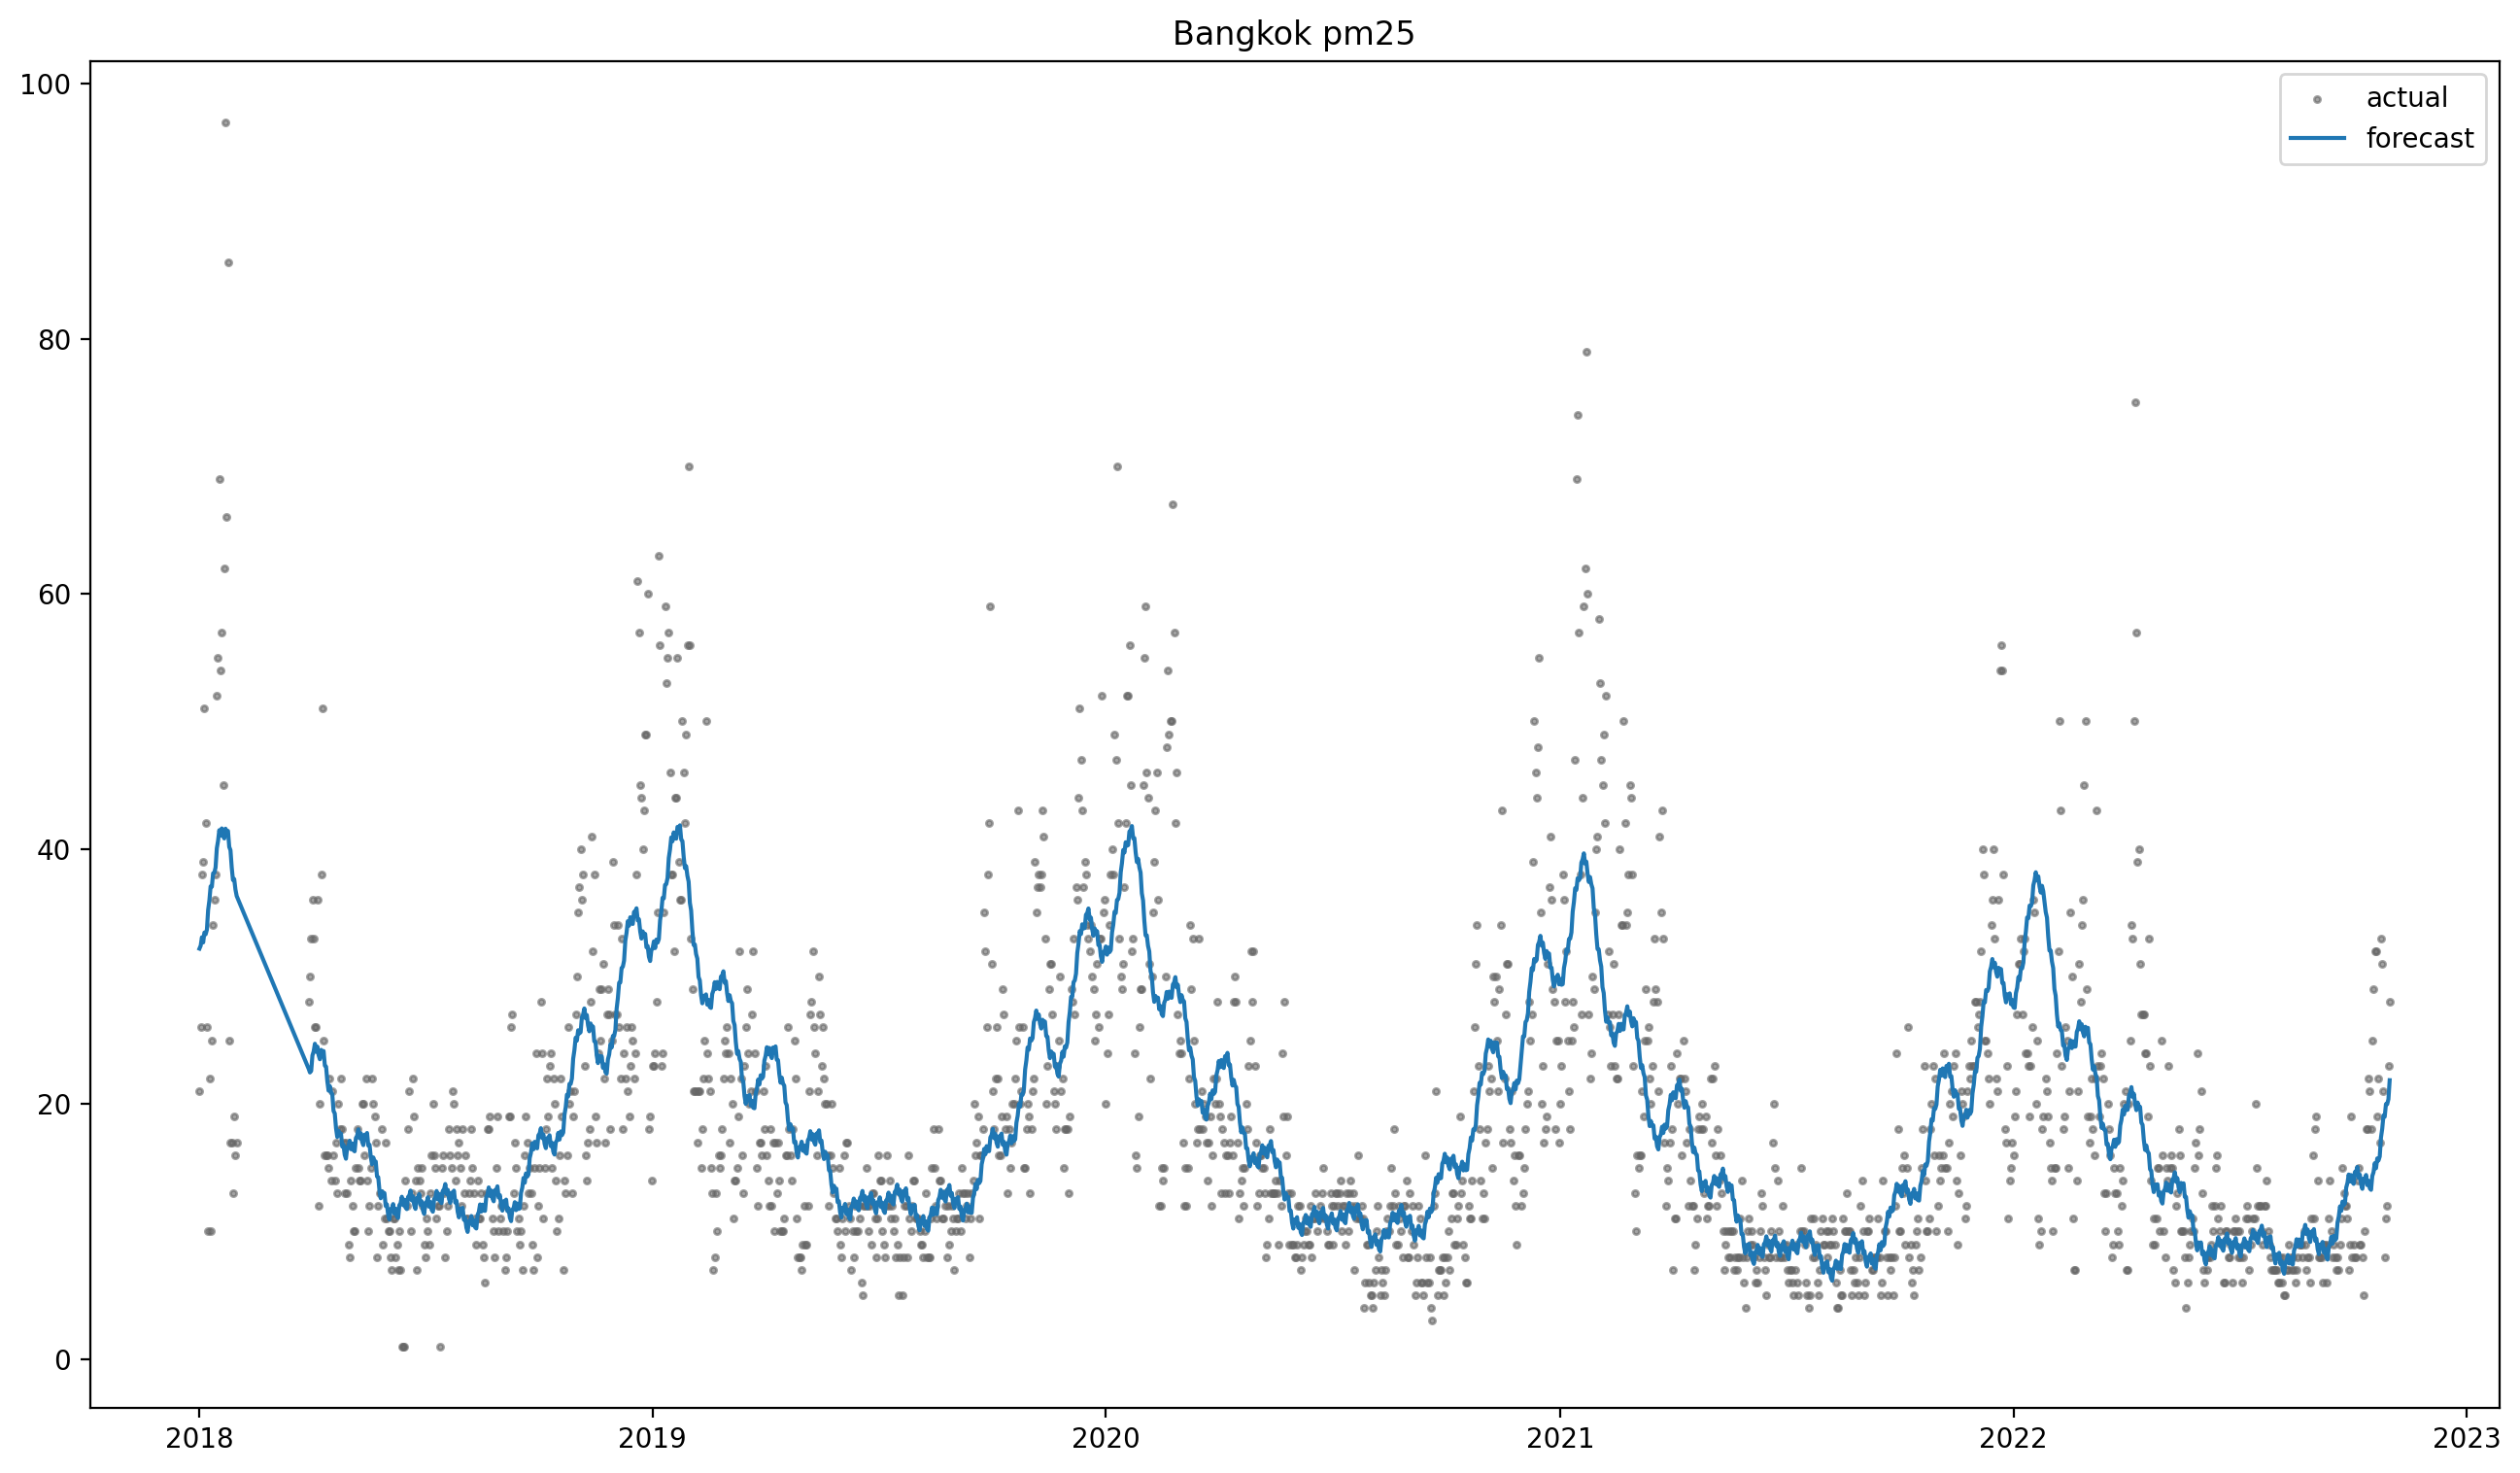

In [95]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Bangkok {y_col}')
plt.legend();

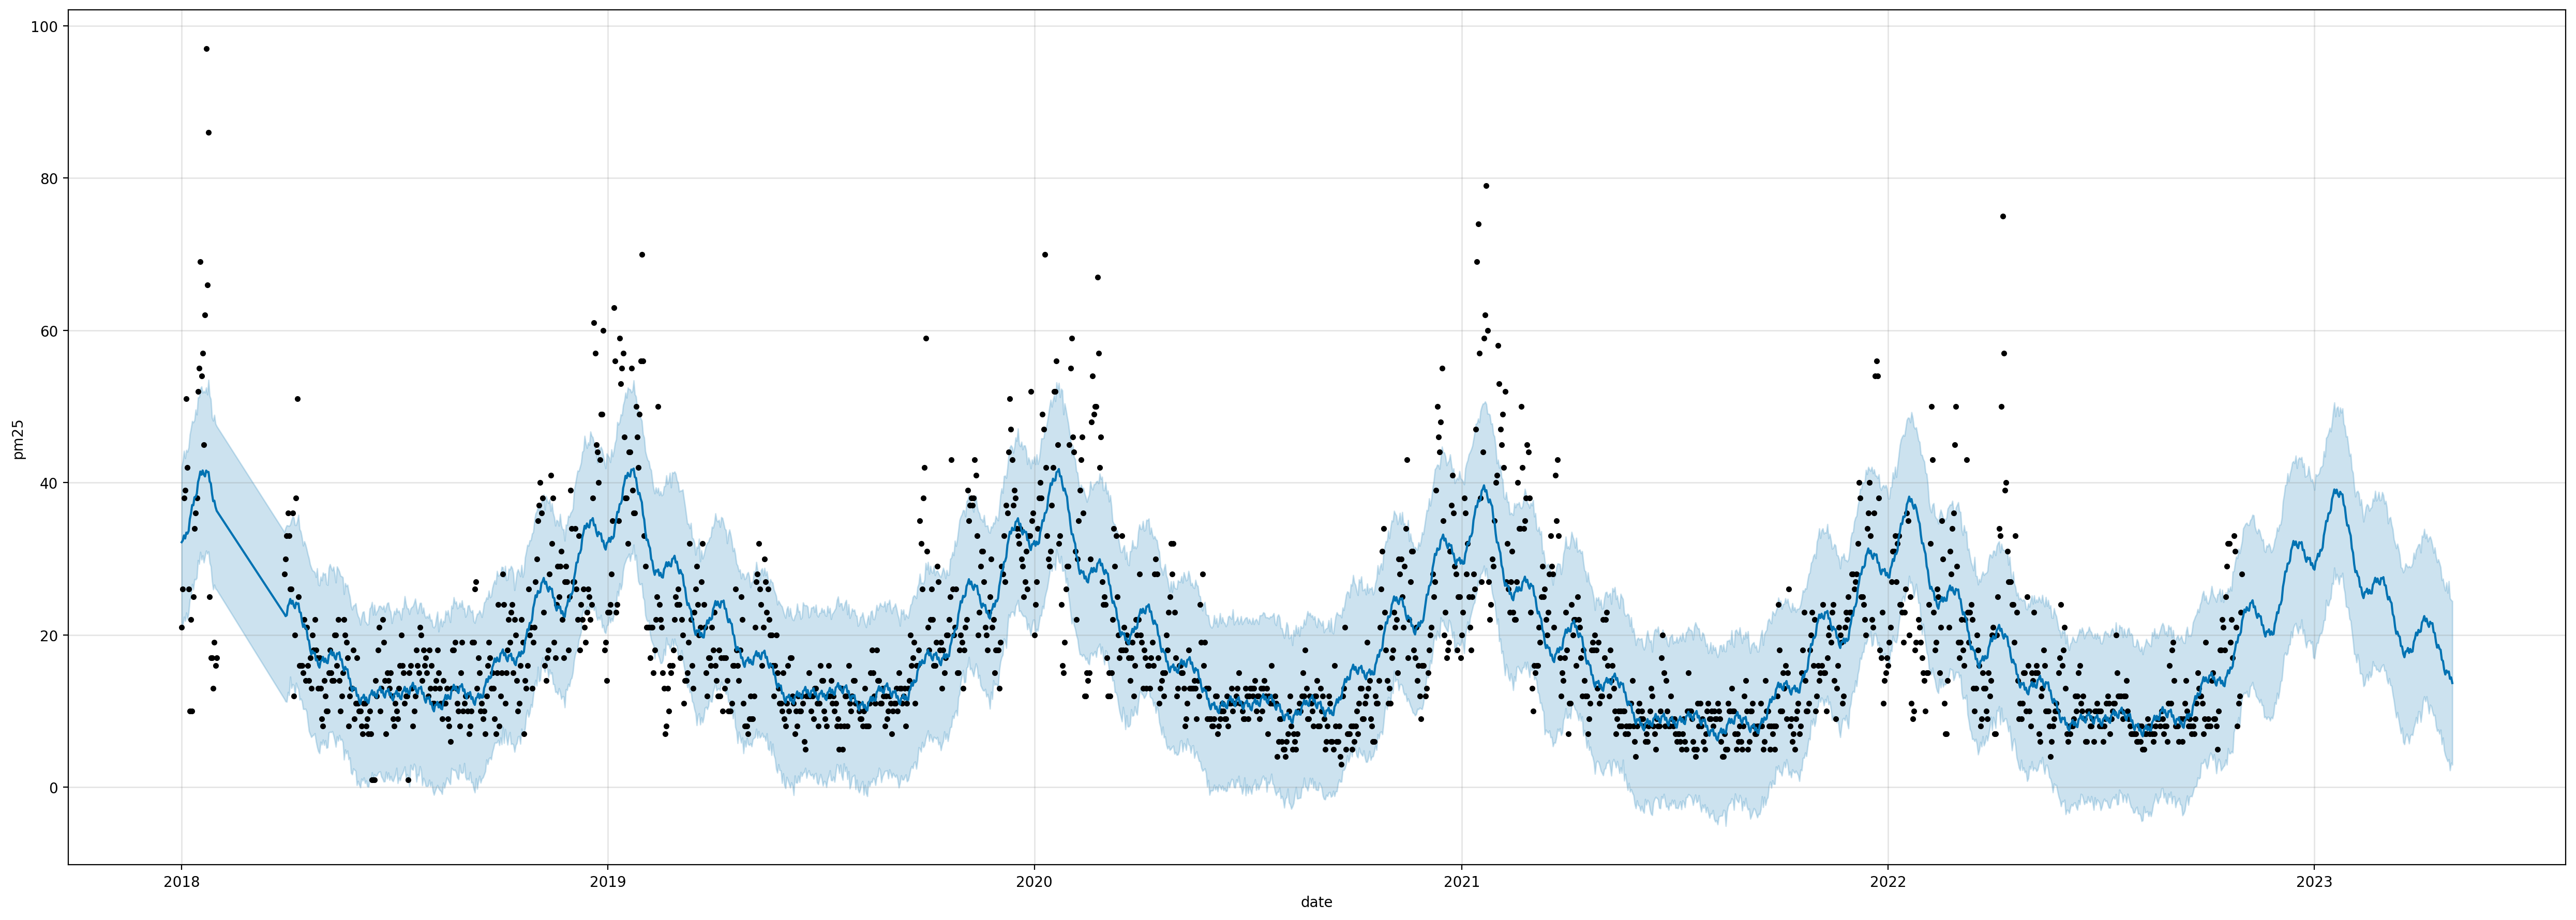

In [96]:
fig=model.plot(forecast, uncertainty=True, figsize=(25, 9), xlabel='date', ylabel=y_col)

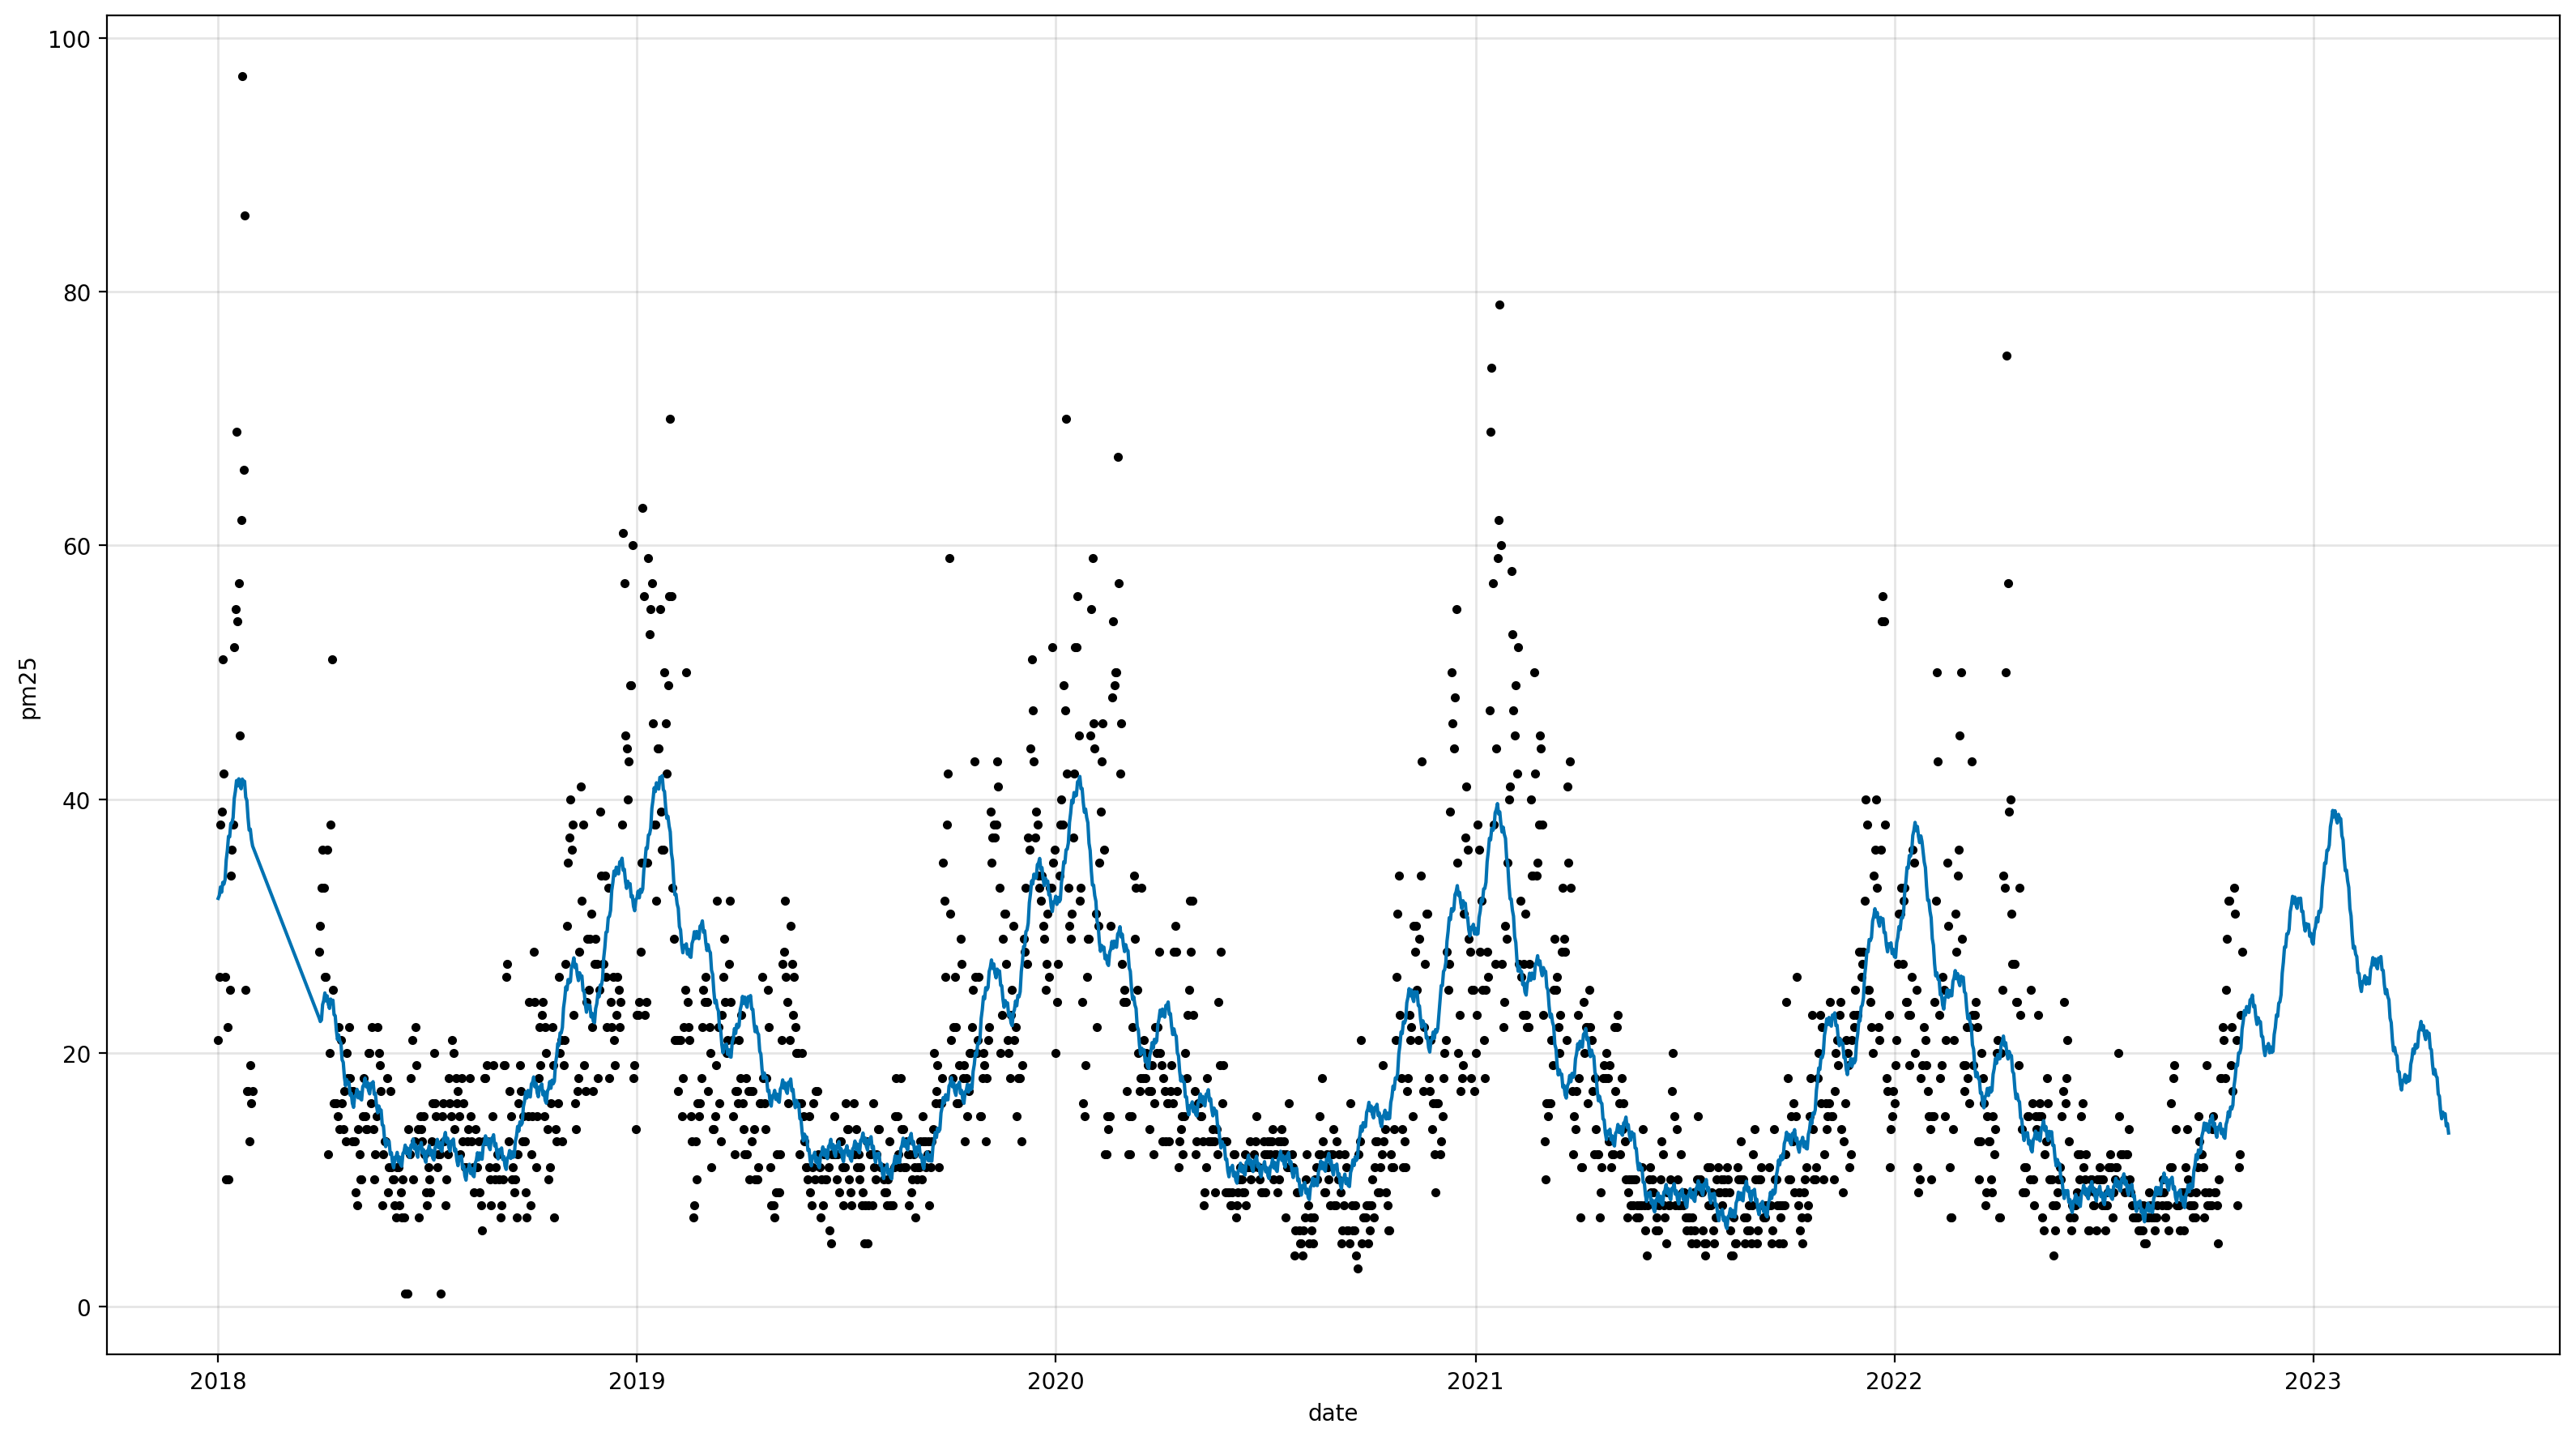

In [97]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [98]:
dfcstnew = forecast.tail(180)

In [99]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

ds       yhat
1706 2022-11-01  22.455937
1707 2022-11-02  23.332704
1708 2022-11-03  22.980599
1709 2022-11-04  23.650254
1710 2022-11-05  23.247951
...         ...        ...
1881 2023-04-25  15.065846
1882 2023-04-26  15.201363
1883 2023-04-27  14.234972
1884 2023-04-28  14.424370
1885 2023-04-29  13.679351

[180 rows x 2 columns]

In [100]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0)
ypred

ds  yhat
1706 2022-11-01  22.0
1707 2022-11-02  23.0
1708 2022-11-03  23.0
1709 2022-11-04  24.0
1710 2022-11-05  23.0
...         ...   ...
1881 2023-04-25  15.0
1882 2023-04-26  15.0
1883 2023-04-27  14.0
1884 2023-04-28  14.0
1885 2023-04-29  14.0

[180 rows x 2 columns]

In [101]:
ypred.mean().round(0)

yhat    26.0
dtype: float64

In [102]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [103]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [104]:
mse3 = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse3

72.98719474410544

In [105]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse3 = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse3) 
ans

8.543254341532004

In [106]:
#Xgboost

In [107]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [108]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
data = pd.read_csv('/content/drive/MyDrive/code/code/rajthewee/dataAir.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,],parse_dates=['date'], skipinitialspace=True)
data

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 11 columns]

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm25              1706 non-null   float64       
 2   pm10              1764 non-null   float64       
 3   o3                1701 non-null   float64       
 4   no2               1454 non-null   float64       
 5   co                1247 non-null   float64       
 6   avgT              1695 non-null   float64       
 7   humid             1765 non-null   float64       
 8   pressure-monthly  1765 non-null   float64       
 9   windDir           1735 non-null   float64       
 10  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 151.8 KB


In [113]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1760 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1761 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1762 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1763 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1764 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 11 columns]

In [114]:
y_col='pm25'

In [115]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1701 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1702 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1703 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1704 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1705 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1701           1009.24    120.0      9.0  
1702           1009.24    170.0      7.0  
1703           1009.24    120.0     13.0  
1704           1009.24    120.0     13.0  
1705           1009.24      NaN      NaN  

[1706 rows x 11 columns]

In [116]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [117]:
date_parts(data)

In [118]:
data

date  pm25  pm10     o3    no2    co  avgT  humid  \
0    2018-01-01  21.0  32.0  37.91  13.26  0.64  27.1   70.0   
1    2018-01-02  26.0  37.0  38.22  18.96  0.68  27.5   67.0   
2    2018-01-03  38.0  51.0  29.50  29.08  0.85  28.2   66.0   
3    2018-01-04  39.0  55.0  45.09  22.22  0.86  29.3   64.0   
4    2018-01-05  51.0  67.0  49.26  36.70  1.00  30.4   63.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1701 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1702 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1703 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1704 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   
1705 2022-10-31  28.0  45.0  52.61    NaN   NaN   NaN   59.0   

      pressure-monthly  windDir  windSpd  year  month  day   day_name  
0              1009.40    100.0      9.0  2018      1    1     Monday  
1              1009.40    120.0      4.0  2018      1    2    Tuesday  
2              1009.40     60.0      4.0  2018      1    3  Wednesday  
3              1009.40    330.0      6.0  2018      1    4   Thursday  
4              1009.40      NaN      NaN  2018      1    5     Friday  
...                ...      ...      ...   ...    ...  ...        ...  
1701           1009.24    120.0      9.0  2022     10   27   Thursday  
1702           1009.24    170.0      7.0  2022     10   28     Friday  
1703           1009.24    120.0     13.0  2022     10   29   Saturday  
1704           1009.24    120.0     13.0  2022     10   30     Sunday  
1705           1009.24      NaN      NaN  2022     10   31     Monday  

[1706 rows x 15 columns]

In [119]:
data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'co', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [120]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

date  year  month  day   day_name  pm25
0    2018-01-01  2018      1    1     Monday  21.0
1    2018-01-02  2018      1    2    Tuesday  26.0
2    2018-01-03  2018      1    3  Wednesday  38.0
3    2018-01-04  2018      1    4   Thursday  39.0
4    2018-01-05  2018      1    5     Friday  51.0
...         ...   ...    ...  ...        ...   ...
1701 2022-10-27  2022     10   27   Thursday   8.0
1702 2022-10-28  2022     10   28     Friday  11.0
1703 2022-10-29  2022     10   29   Saturday  12.0
1704 2022-10-30  2022     10   30     Sunday  23.0
1705 2022-10-31  2022     10   31     Monday  28.0

[1706 rows x 6 columns]

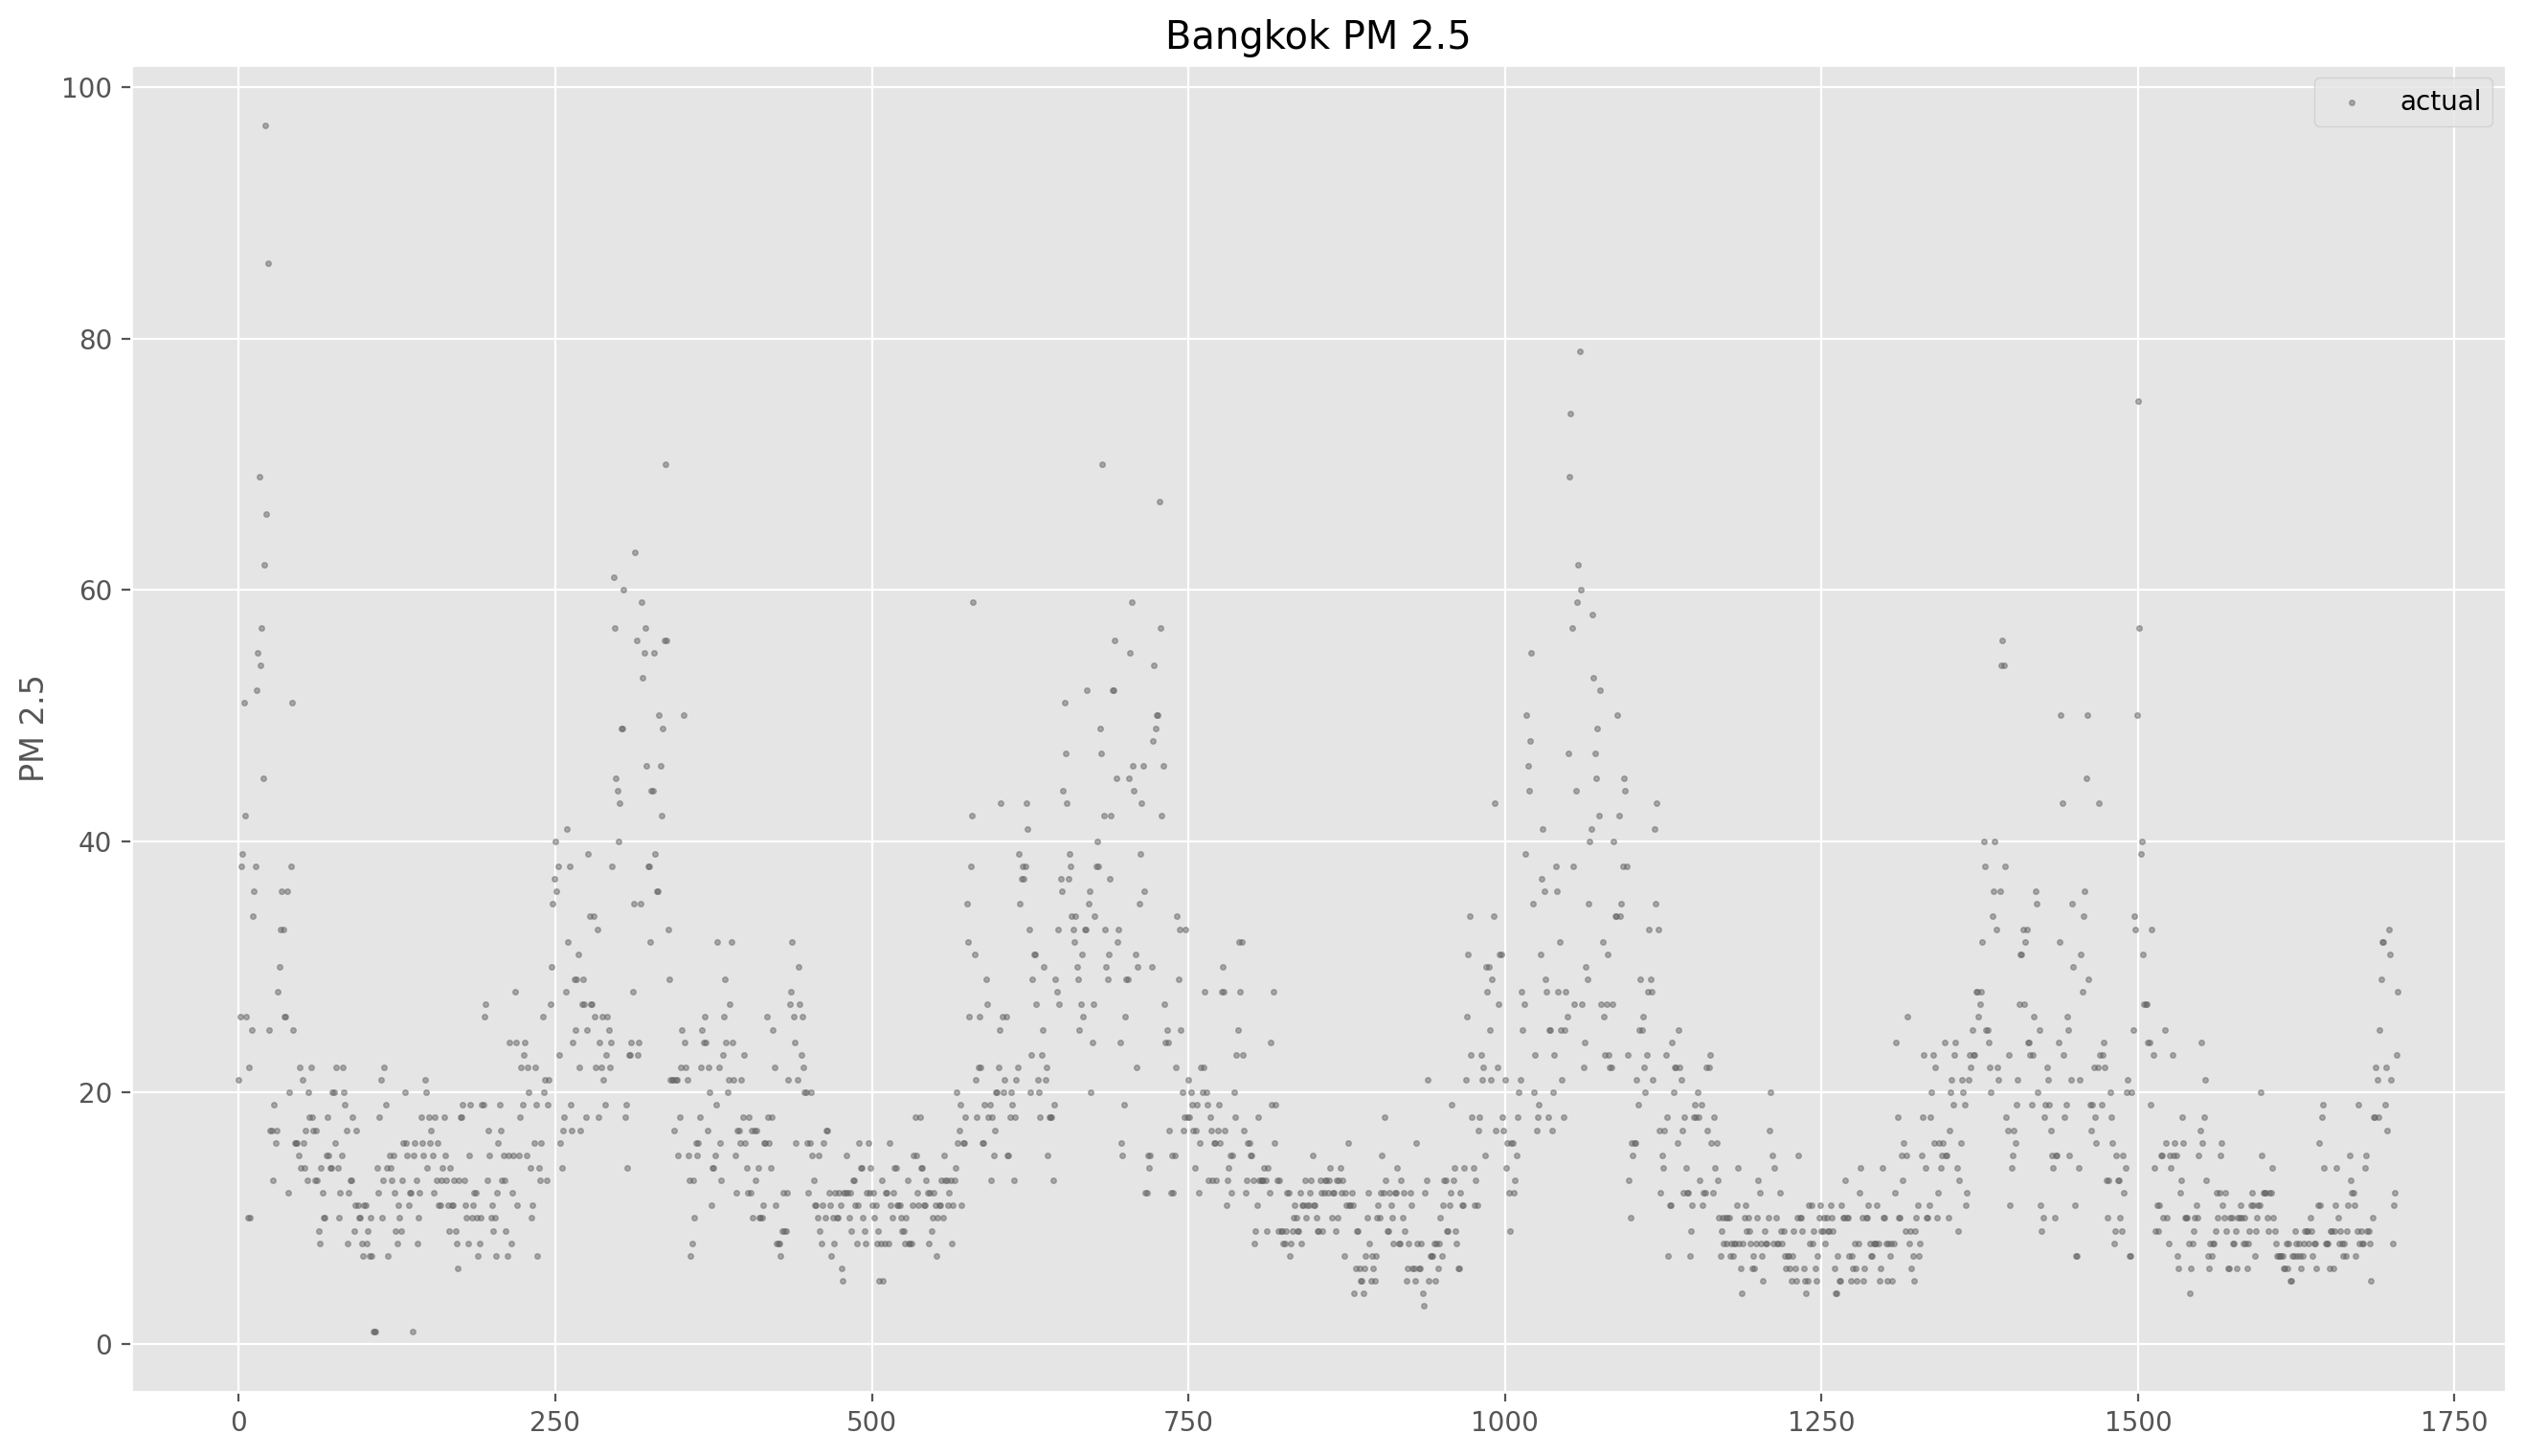

In [121]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [122]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [123]:
df=data.copy()
df['y']=df['pm25'].shift(-1)

In [124]:
train=df[:-1500]
test=df[-1500:]
test=test.drop(test.tail(1).index)

In [125]:
X_train1 = train['y'].values.reshape(-1,1)
y_test1 = test['pm25'].values.reshape(-1,1)
y_train1 = train['y'].values.reshape(-1,1)
X_test1 =test['pm25'].values.reshape(-1,1)

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train1, y=y_train1.ravel())
reg_pred = reg.predict(X_test1)
test['gbr_pred'] = reg_pred
test

date  pm25  pm10     o3    no2    co  avgT  humid  \
206  2018-09-21  19.0  36.0  19.30  25.91  1.31  30.4   79.0   
207  2018-09-22  17.0  27.0  25.61  18.48  1.21  30.5   78.0   
208  2018-09-23  13.0  24.0  12.52  19.83  1.33  30.3   85.0   
209  2018-09-24  15.0  28.0   4.83  22.43  1.51  27.3   94.0   
210  2018-09-25  13.0  27.0  15.39  16.13  1.31  30.4   83.0   
...         ...   ...   ...    ...    ...   ...   ...    ...   
1700 2022-10-26  21.0  41.0  31.61    NaN   NaN  30.3   69.0   
1701 2022-10-27   8.0  20.0  16.91    NaN   NaN  28.5   79.0   
1702 2022-10-28  11.0  26.0  17.96    NaN   NaN  29.6   72.0   
1703 2022-10-29  12.0  27.0  33.70    NaN   NaN  29.5   62.0   
1704 2022-10-30  23.0  43.0  45.26    NaN   NaN  30.0   62.0   

      pressure-monthly  windDir  windSpd  year  month  day   day_name     y  \
206            1007.37    180.0      6.0  2018      9   21     Friday  17.0   
207            1007.37    180.0      8.0  2018      9   22   Saturday  13.0   
208            1007.37    150.0      6.0  2018      9   23     Sunday  15.0   
209            1007.37    120.0      6.0  2018      9   24     Monday  13.0   
210            1007.37    270.0      9.0  2018      9   25    Tuesday   9.0   
...                ...      ...      ...   ...    ...  ...        ...   ...   
1700           1009.24    110.0      7.0  2022     10   26  Wednesday   8.0   
1701           1009.24    120.0      9.0  2022     10   27   Thursday  11.0   
1702           1009.24    170.0      7.0  2022     10   28     Friday  12.0   
1703           1009.24    120.0     13.0  2022     10   29   Saturday  23.0   
1704           1009.24    120.0     13.0  2022     10   30     Sunday  28.0   

       gbr_pred  
206   18.999719  
207   16.999821  
208   13.000241  
209   15.000008  
210   13.000241  
...         ...  
1700  20.999440  
1701   8.001068  
1702  11.000414  
1703  12.000290  
1704  21.999649  

[1499 rows x 17 columns]

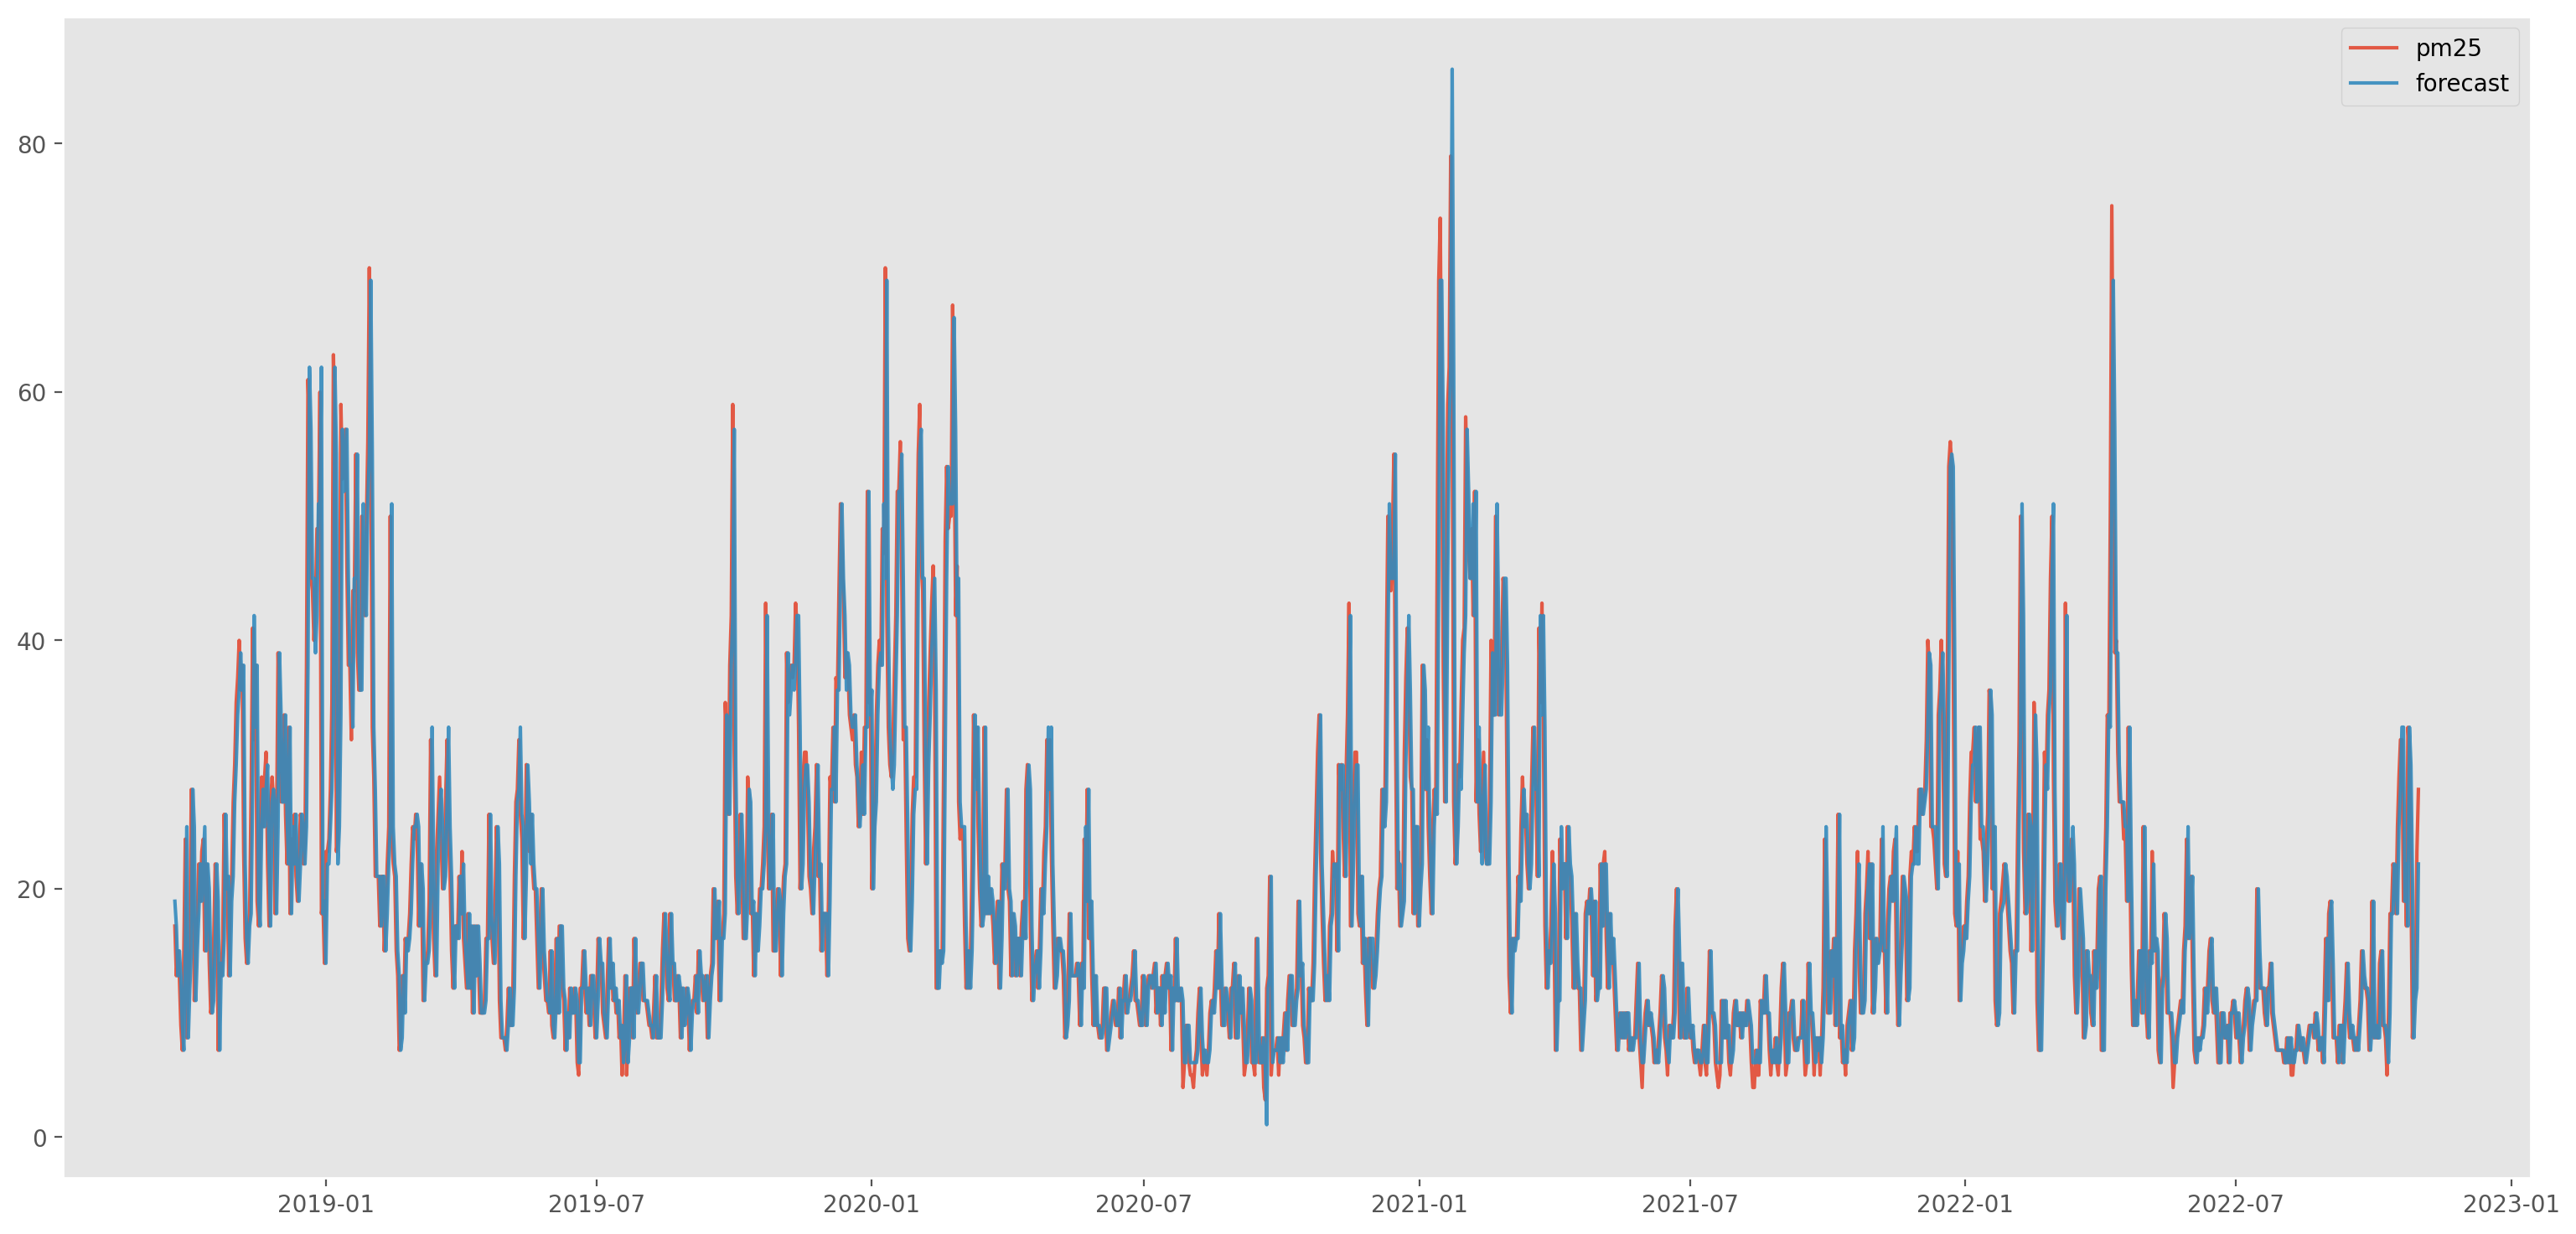

In [127]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [128]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [129]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [130]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7f22191b8eb0>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F22168B2640)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F22168B2640)],
        [DecisionTreeRegressor(criterion='fried

In [131]:
yhat=[]
yhat = reg.predict(X_test1)

In [132]:
Y_Pred=reg.predict(X_test1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test1,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 0.3070597106482789
Rmse 0.5541296875716721


In [133]:
fig = plt.figure()      
ax = fig   

<Figure size 2000x1000 with 0 Axes>

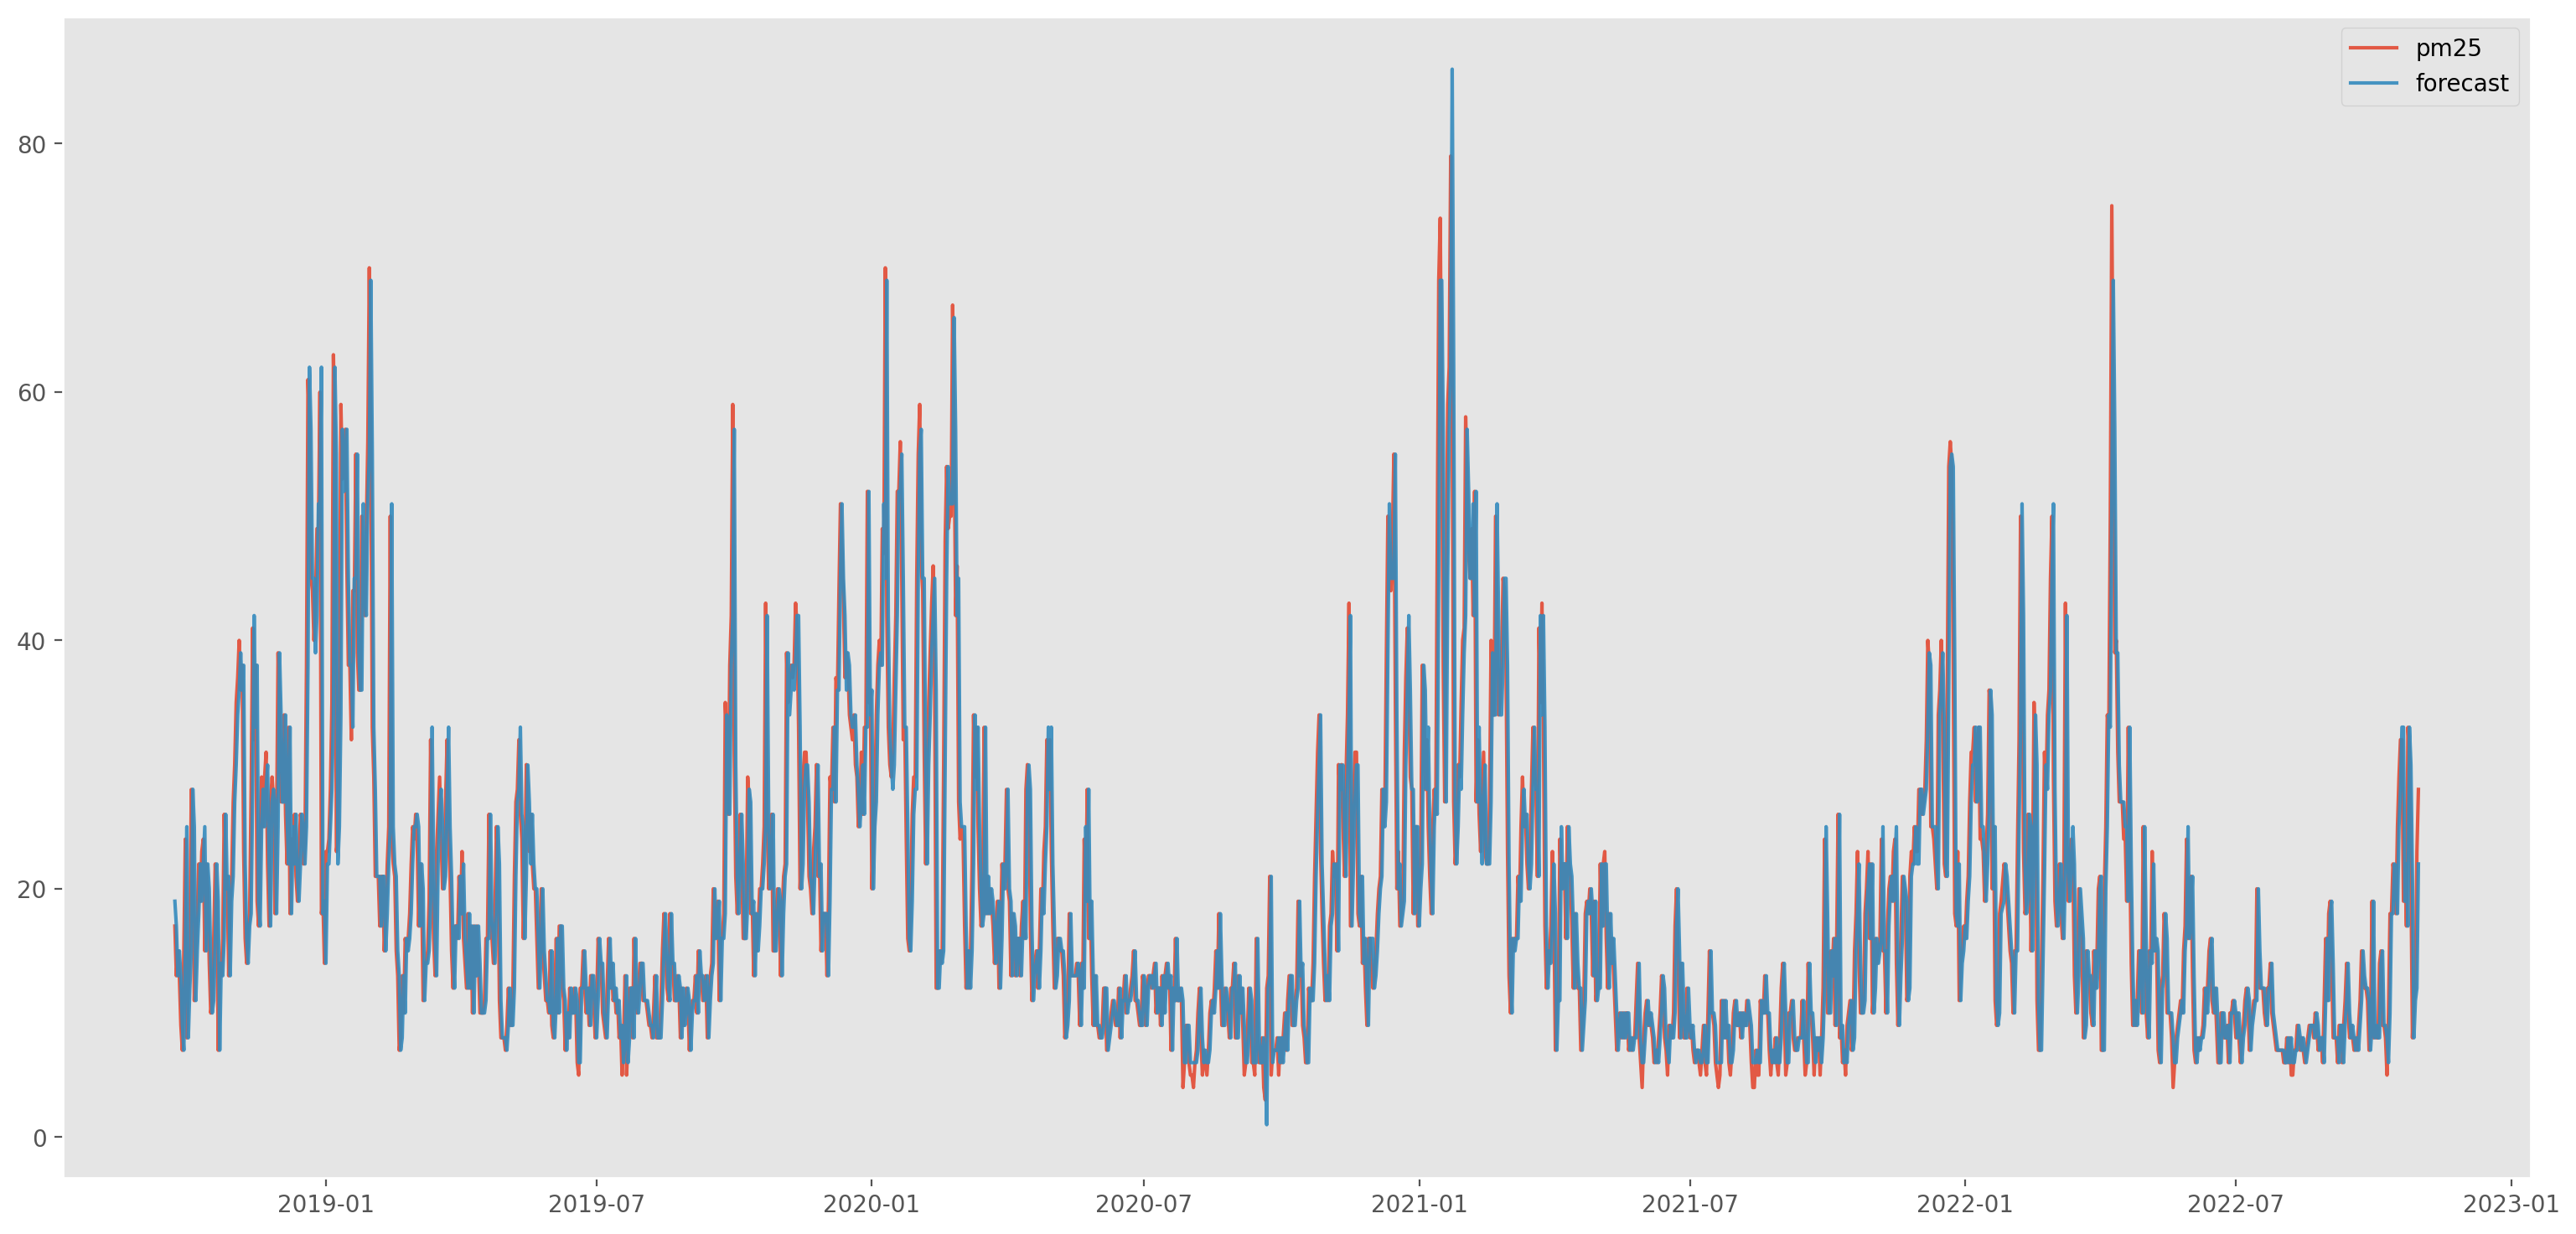

In [134]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

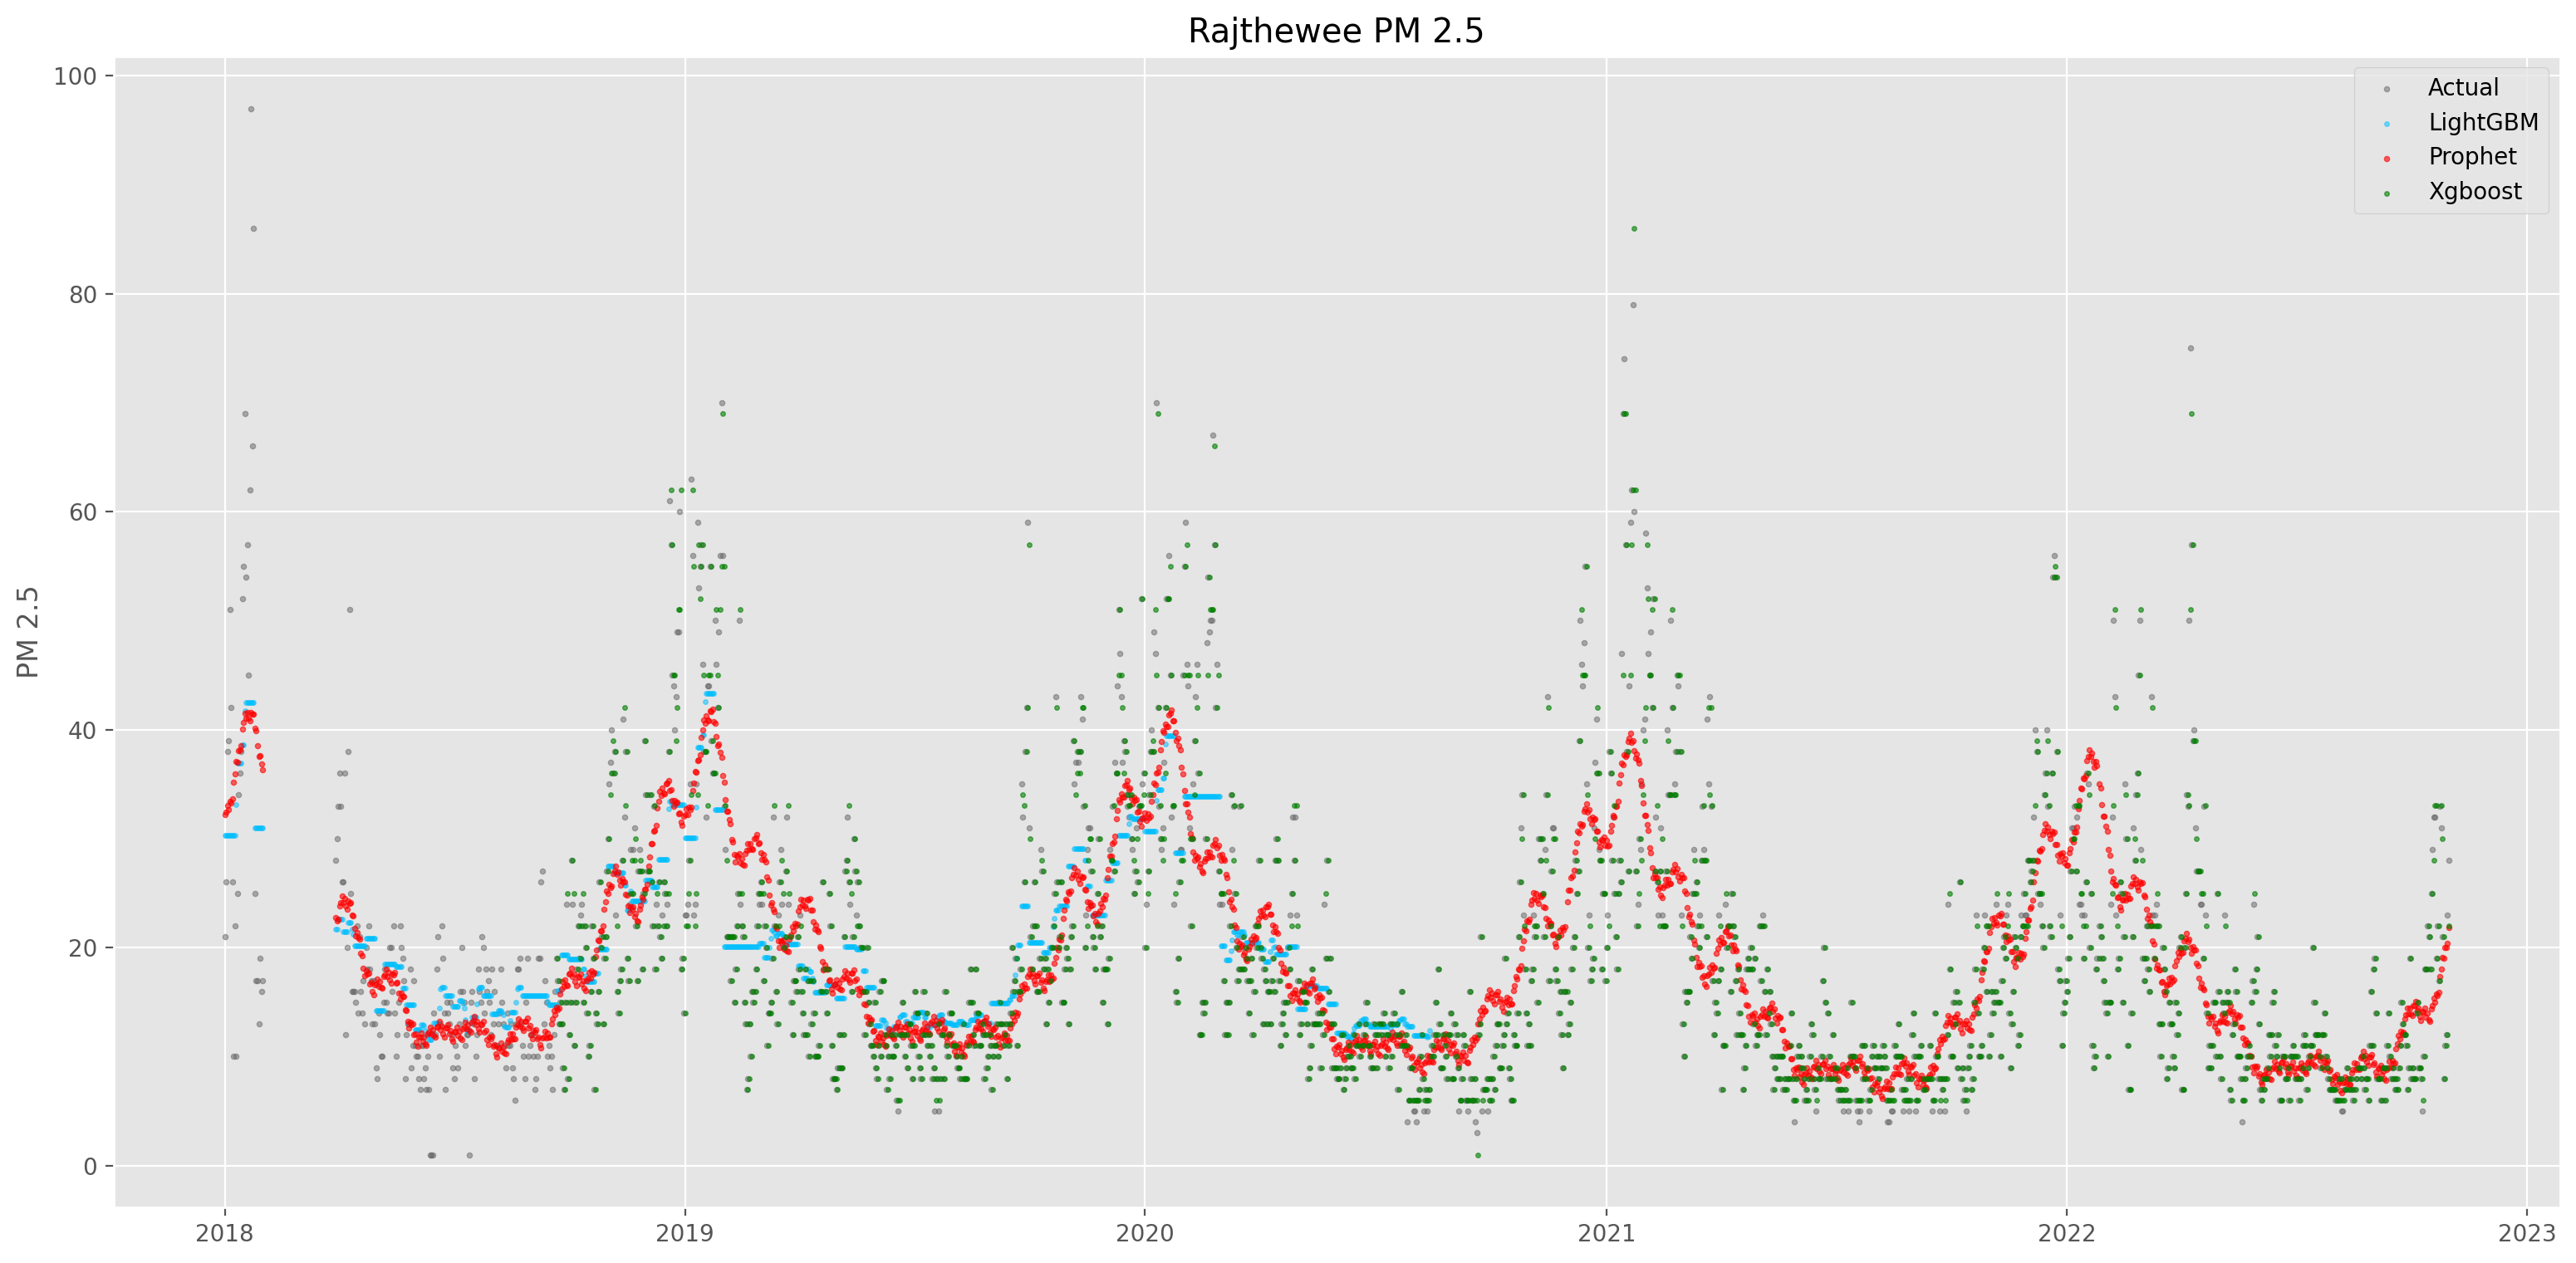

In [136]:
# กราฟ train LightGBM, Prophet, Xgboot
plt.figure(figsize=(19, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, label='Actual', s=5,color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='LightGBM', color='deepskyblue')
plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='red')
plt.scatter('date',dtype,data=fc,alpha=.6,s=4,label='Xgboost', color='green')

plt.ylabel('PM 2.5')
plt.title('Rajthewee PM 2.5')
plt.legend();

#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange
#plt.scatter('date',dtype,data=fc,label='xgboost',alpha=.5 ,s=4,color='red')
#plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='blue')
#-------------
#plt.scatter(train.index, reg.predict(X_train1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(test.index, reg.predict(X_test1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='LightGBM_test', color='orange')
